In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np

# Load the data
info_A0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik6a.csv")

In [17]:
# Assuming your data is stored in a DataFrame called 'data'
datapoints_per_country = info_A0['country_name'].value_counts()
print(datapoints_per_country)

country_name
Thailand     978
Indonesia    759
Malaysia      63
Name: count, dtype: int64


In [18]:
# Re-filter the samples to ensure we have the correct starting point
th_samples = info_A0[info_A0['country_char'] == 'TH']
id_samples = info_A0[info_A0['country_char'] == 'ID']

# Ensure each 'prov_char' has at least one sample
th_prov_samples = th_samples.groupby('prov_char').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
id_prov_samples = id_samples.groupby('prov_char').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)

# Calculate how many more samples we need to reach 60, ensuring we don't sample more than we have
th_needed = max(0, 70 - th_prov_samples.shape[0])
id_needed = max(0, 70 - id_prov_samples.shape[0])

# Get the remaining samples excluding the ones already taken per 'prov_char'
th_remaining_samples = th_samples.loc[~th_samples.index.isin(th_prov_samples.index)].sample(n=th_needed, random_state=42)
id_remaining_samples = id_samples.loc[~id_samples.index.isin(id_prov_samples.index)].sample(n=id_needed, random_state=42)

# Concatenate to form final datasets for TH and ID
final_th_samples = pd.concat([th_prov_samples, th_remaining_samples])
final_id_samples = pd.concat([id_prov_samples, id_remaining_samples])

# Combine back with the rest of the data
remaining_samples = info_A0[(info_A0['country_char'] != 'TH') & (info_A0['country_char'] != 'ID')]
final_info_A0 = pd.concat([remaining_samples, final_th_samples, final_id_samples])

# Display the new counts
final_th_count = final_th_samples.shape[0]
final_id_count = final_id_samples.shape[0]

final_th_count, final_id_count, final_info_A0.shape


C:\Users\pingk\AppData\Local\Temp\ipykernel_36168\3249348469.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  th_prov_samples = th_samples.groupby('prov_char').apply(lambda x: x.sample(1, random_state=42)).reset_index(drop=True)
C:\Users\pingk\AppData\Local\Temp\ipykernel_36168\3249348469.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  id_prov_samples = id_samples.groupby('prov_char').apply(lambda x:

(70, 70, (203, 6958))

In [19]:
final_info_A0.reset_index(drop=True)

prov_char country_char                   wavenumber   649.893   650.376  \
0         JHR           MY      MY-JHR-072-2311-001_001  0.012000  0.013086   
1         JHR           MY      MY-JHR-072-2311-001_002  0.012464  0.012913   
2         JHR           MY      MY-JHR-072-2311-001_004  0.012081  0.011503   
3         JHR           MY      MY-JHR-072-2311-001_005  0.018062  0.018733   
4         JHR           MY      MY-JHR-072-2311-001_006  0.009738  0.010033   
..        ...          ...                          ...       ...       ...   
198       RIX           ID      ID-RIX-070-2312-003_009  0.009732  0.007320   
199       KBX           ID      ID-KBX-068-2306-008_002  0.013213  0.013587   
200       KBX           ID  ID-KBX-068-2306-007_008 (2)  0.014849  0.014461   
201       BBX           ID      ID-BBX-095-2401-004_005  0.018640  0.018850   
202       BBX           ID      ID-BBX-095-2401-003_002  0.014643  0.015673   

      650.858    651.34   651.822   652.304   652.786  ...  3998.194  \
0    0.013535  0.013313  0.012536  0.011449  0.010345  ...  0.001762   
1    0.012850  0.012322  0.011484  0.010559  0.009763  ...  0.001997   
2    0.010965  0.010446  0.009933  0.009444  0.009033  ...  0.002338   
3    0.018778  0.018094  0.016689  0.014735  0.012542  ...  0.001827   
4    0.010460  0.011020  0.011668  0.012304  0.012804  ...  0.000820   
..        ...       ...       ...       ...       ...  ...       ...   
198  0.005505  0.004496  0.004355  0.004963  0.006065  ...  0.000442   
199  0.013690  0.013473  0.013021  0.012535  0.012246  ...  0.001138   
200  0.014125  0.013919  0.013901  0.014080  0.014404  ...  0.003042   
201  0.019319  0.020078  0.021077  0.022143  0.023017  ...  0.003327   
202  0.016613  0.017338  0.017796  0.018006  0.018024  ...  0.001097   

     3998.676  3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  \
0    0.001847  0.001926  0.001995  0.002060   Group 2   Group 2   Group 3   
1    0.002258  0.002454  0.002561  0.002573   Group 2   Group 2   Group 3   
2    0.002555  0.002718  0.002800  0.002794   Group 2   Group 2   Group 3   
3    0.002028  0.002243  0.002442  0.002598   Group 2   Group 2   Group 3   
4    0.000919  0.001059  0.001194  0.001286   Group 2   Group 2   Group 3   
..        ...       ...       ...       ...       ...       ...       ...   
198  0.000527  0.000630  0.000722  0.000766   Group 2   Group 2   Group 3   
199  0.001160  0.001154  0.001126  0.001090   Group 3   Group 2   Group 4   
200  0.002949  0.002834  0.002709  0.002584   Group 3   Group 2   Group 4   
201  0.003157  0.002937  0.002715  0.002548   Group 3   Group 2   Group 3   
202  0.001478  0.001720  0.001806  0.001756   Group 3   Group 2   Group 3   

     country_name  thnoth_name  
0        Malaysia     Non-Thai  
1        Malaysia     Non-Thai  
2        Malaysia     Non-Thai  
3        Malaysia     Non-Thai  
4        Malaysia     Non-Thai  
..            ...          ...  
198     Indonesia     Non-Thai  
199     Indonesia     Non-Thai  
200     Indonesia     Non-Thai  
201     Indonesia     Non-Thai  
202     Indonesia     Non-Thai  

[203 rows x 6958 columns]

In [20]:
info_A1 = final_info_A0.reset_index(drop=True)

In [21]:
# Assuming your data is stored in a DataFrame called 'data'
datapoints_per_country = info_A1['country_name'].value_counts()
print(datapoints_per_country)

country_name
Thailand     70
Indonesia    70
Malaysia     63
Name: count, dtype: int64


In [22]:
info_A1.to_csv(r"C:\Users\pingk\Downloads\fadhli nitip\203 sampel rt6.csv", index=False)

In [23]:
info_A1

prov_char country_char                   wavenumber   649.893   650.376  \
0         JHR           MY      MY-JHR-072-2311-001_001  0.012000  0.013086   
1         JHR           MY      MY-JHR-072-2311-001_002  0.012464  0.012913   
2         JHR           MY      MY-JHR-072-2311-001_004  0.012081  0.011503   
3         JHR           MY      MY-JHR-072-2311-001_005  0.018062  0.018733   
4         JHR           MY      MY-JHR-072-2311-001_006  0.009738  0.010033   
..        ...          ...                          ...       ...       ...   
198       RIX           ID      ID-RIX-070-2312-003_009  0.009732  0.007320   
199       KBX           ID      ID-KBX-068-2306-008_002  0.013213  0.013587   
200       KBX           ID  ID-KBX-068-2306-007_008 (2)  0.014849  0.014461   
201       BBX           ID      ID-BBX-095-2401-004_005  0.018640  0.018850   
202       BBX           ID      ID-BBX-095-2401-003_002  0.014643  0.015673   

      650.858    651.34   651.822   652.304   652.786  ...  3998.194  \
0    0.013535  0.013313  0.012536  0.011449  0.010345  ...  0.001762   
1    0.012850  0.012322  0.011484  0.010559  0.009763  ...  0.001997   
2    0.010965  0.010446  0.009933  0.009444  0.009033  ...  0.002338   
3    0.018778  0.018094  0.016689  0.014735  0.012542  ...  0.001827   
4    0.010460  0.011020  0.011668  0.012304  0.012804  ...  0.000820   
..        ...       ...       ...       ...       ...  ...       ...   
198  0.005505  0.004496  0.004355  0.004963  0.006065  ...  0.000442   
199  0.013690  0.013473  0.013021  0.012535  0.012246  ...  0.001138   
200  0.014125  0.013919  0.013901  0.014080  0.014404  ...  0.003042   
201  0.019319  0.020078  0.021077  0.022143  0.023017  ...  0.003327   
202  0.016613  0.017338  0.017796  0.018006  0.018024  ...  0.001097   

     3998.676  3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  \
0    0.001847  0.001926  0.001995  0.002060   Group 2   Group 2   Group 3   
1    0.002258  0.002454  0.002561  0.002573   Group 2   Group 2   Group 3   
2    0.002555  0.002718  0.002800  0.002794   Group 2   Group 2   Group 3   
3    0.002028  0.002243  0.002442  0.002598   Group 2   Group 2   Group 3   
4    0.000919  0.001059  0.001194  0.001286   Group 2   Group 2   Group 3   
..        ...       ...       ...       ...       ...       ...       ...   
198  0.000527  0.000630  0.000722  0.000766   Group 2   Group 2   Group 3   
199  0.001160  0.001154  0.001126  0.001090   Group 3   Group 2   Group 4   
200  0.002949  0.002834  0.002709  0.002584   Group 3   Group 2   Group 4   
201  0.003157  0.002937  0.002715  0.002548   Group 3   Group 2   Group 3   
202  0.001478  0.001720  0.001806  0.001756   Group 3   Group 2   Group 3   

     country_name  thnoth_name  
0        Malaysia     Non-Thai  
1        Malaysia     Non-Thai  
2        Malaysia     Non-Thai  
3        Malaysia     Non-Thai  
4        Malaysia     Non-Thai  
..            ...          ...  
198     Indonesia     Non-Thai  
199     Indonesia     Non-Thai  
200     Indonesia     Non-Thai  
201     Indonesia     Non-Thai  
202     Indonesia     Non-Thai  

[203 rows x 6958 columns]

In [24]:
df = info_A1

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

df = remove_outliers(df)

# Standardize the numeric data
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Identify numeric and string columns
string_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Check the first few rows of the prepared data
print(df.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       JHR           MY  MY-JHR-072-2311-001_001 -0.412113 -0.220955   
1       JHR           MY  MY-JHR-072-2311-001_002 -0.308784 -0.259326   
2       JHR           MY  MY-JHR-072-2311-001_004 -0.394040 -0.571592   
3       JHR           MY  MY-JHR-072-2311-001_005  0.939044  1.029604   
4       JHR           MY  MY-JHR-072-2311-001_006 -0.916498 -0.897033   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0 -0.156993 -0.218872 -0.374074 -0.569816 -0.747842  ...  0.351322  0.382274   
1 -0.305580 -0.428608 -0.591890 -0.750371 -0.863023  ...  0.466616  0.585936   
2 -0.714340 -0.825878 -0.913387 -0.976703 -1.007671  ...  0.633575  0.732970   
3  0.980111  0.793357  0.486408  0.097071 -0.312733  ...  0.382835  0.472186   
4 -0.824036 -0.704401 -0.553762 -0.396286 -0.260889  ... -0.110500 -0.077395   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

In [25]:
numeric_cols

Index(['649.893', '650.376', '650.858', '651.34', '651.822', '652.304',
       '652.786', '653.268', '653.75', '654.232',
       ...
       '3995.783', '3996.265', '3996.747', '3997.23', '3997.712', '3998.194',
       '3998.676', '3999.158', '3999.64', '4000.122'],
      dtype='object', length=6950)

In [26]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])

# Check the encoded target variable
print(df[['country_name', 'country_name_encoded']])

    country_name  country_name_encoded
0       Malaysia                     1
1       Malaysia                     1
2       Malaysia                     1
3       Malaysia                     1
4       Malaysia                     1
..           ...                   ...
187    Indonesia                     0
188    Indonesia                     0
189    Indonesia                     0
190    Indonesia                     0
191    Indonesia                     0

[192 rows x 2 columns]


C:\Users\pingk\AppData\Local\Temp\ipykernel_36168\2480830658.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['country_name_encoded'] = label_encoder.fit_transform(df['country_name'])


In [28]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the LOOCV procedure
loo = LeaveOneOut()

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Check the first few rows of the features and target variable
print(X.head())
print(y.head())


    649.893   650.376   650.858    651.34   651.822   652.304   652.786  \
0 -0.412113 -0.220955 -0.156993 -0.218872 -0.374074 -0.569816 -0.747842   
1 -0.308784 -0.259326 -0.305580 -0.428608 -0.591890 -0.750371 -0.863023   
2 -0.394040 -0.571592 -0.714340 -0.825878 -0.913387 -0.976703 -1.007671   
3  0.939044  1.029604  0.980111  0.793357  0.486408  0.097071 -0.312733   
4 -0.916498 -0.897033 -0.824036 -0.704401 -0.553762 -0.396286 -0.260889   

    653.268    653.75   654.232  ...  3995.783  3996.265  3996.747   3997.23  \
0 -0.855778 -0.865952 -0.777485  ...  0.349437  0.322054  0.306902  0.308032   
1 -0.903510 -0.873563 -0.797247  ...  0.091455  0.094634  0.139455  0.224018   
2 -0.997357 -0.943319 -0.849300  ...  0.263041  0.301872  0.357678  0.433564   
3 -0.664910 -0.898476 -0.993028  ...  0.272956  0.259852  0.257066  0.273072   
4 -0.175734 -0.155391 -0.196829  ...  0.292181  0.175822  0.054152 -0.044852   

   3997.712  3998.194  3998.676  3999.158   3999.64  4000.122  
0  0

In [29]:
# Specific samples to leave out based on 'prov_char'
leave_out_provs = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Store predictions and actual values
predictions = []
actuals = []

# Apply LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check if the test sample should be left out
    if df.iloc[test_index]['prov_char'].values[0] in leave_out_provs:
        continue
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction and actual value
    predictions.append(y_pred[0])
    actuals.append(y_test.values[0])

# Check the first few predictions and actual values
print(predictions[:5])
print(actuals[:5])


[np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(1)]
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(actuals, predictions)
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='macro')
f1 = f1_score(actuals, predictions, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.6783625730994152
Precision: 0.6774012160260038
Recall: 0.6883024042950514
F1 Score: 0.681657848324515


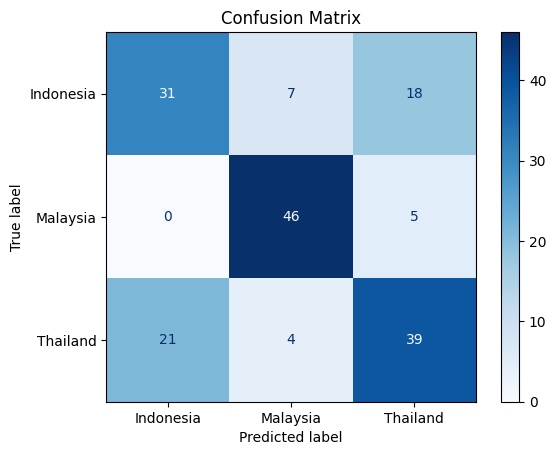

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(actuals, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.6379310344827587
Precision: 0.6454042715484363
Recall: 0.6528478057889823
F1 Score: 0.644004469585865



Train-Test 80:20, RF

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.6666666666666666
Precision: 0.686106921401039
Recall: 0.6848544973544973
F1 Score: 0.6812095744242574



In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


Train-Test 80:20, RF, GB, SVC, k-NN

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1 Score': f1_score(y_train, y_train_pred, average='macro')
    }
    
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='macro'),
        'Recall': recall_score(y_test, y_test_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_test_pred, average='macro')
    }
    
    return train_metrics, test_metrics

# Evaluate each model on both training and test sets
train_test_results = {}
for name, model in models.items():
    print(f"Evaluating train vs test for {name}...")
    train_metrics, test_metrics = evaluate_train_test(model, X_train, y_train, X_test, y_test)
    train_test_results[name] = {'Train': train_metrics, 'Test': test_metrics}

# Display the train vs test results
for model_name, metrics in train_test_results.items():
    print(f"Model: {model_name}")
    for dataset, dataset_metrics in metrics.items():
        print(f"{dataset} Set:")
        for metric_name, score in dataset_metrics.items():
            print(f"{metric_name}: {score}")
        print()


Evaluating train vs test for Random Forest...
Evaluating train vs test for Gradient Boosting...
Evaluating train vs test for SVM...
Evaluating train vs test for k-NN...
Model: Random Forest
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.6666666666666666
Precision: 0.686106921401039
Recall: 0.6848544973544973
F1 Score: 0.6812095744242574

Model: Gradient Boosting
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.7692307692307693
Precision: 0.7662337662337663
Recall: 0.7843915343915344
F1 Score: 0.7714285714285714

Model: SVM
Train Set:
Accuracy: 0.9803921568627451
Precision: 0.9814814814814815
Recall: 0.9803921568627452
F1 Score: 0.9805091937765206

Test Set:
Accuracy: 0.5897435897435898
Precision: 0.6238095238095238
Recall: 0.6415343915343915
F1 Score: 0.6003474870751758

Model: k-NN
Train Set:
Accuracy: 0.6993464052287581
Precision: 0.71424774056353
Recall: 0.699346405228758
F1 Score: 0.6854412935225201



K-Fold 10, RF

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'country_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['country_name_encoded']

# Cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Generate the classification report
report = classification_report(y, y_pred, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

   Indonesia       0.57      0.49      0.53        65
    Malaysia       0.78      0.87      0.82        60
    Thailand       0.58      0.60      0.59        67

    accuracy                           0.65       192
   macro avg       0.64      0.65      0.65       192
weighted avg       0.64      0.65      0.64       192



### Classification Report Breakdown

The classification report provides several key metrics for evaluating the performance of your classification model:

1. **Class-wise Metrics:**
   - **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
   - **Recall:** The ratio of correctly predicted positive observations to all the observations in the actual class. High recall indicates a low false negative rate.
   - **F1-Score:** The weighted average of precision and recall. A good F1-score indicates a balance between precision and recall.
   - **Support:** The number of actual occurrences of the class in the dataset.

2. **Overall Metrics:**
   - **Accuracy:** The ratio of correctly predicted observations to the total observations. Accuracy is a good measure when the classes are well-balanced.
   - **Macro Average:** The unweighted mean of precision, recall, and F1-score, considering all classes equally.
   - **Weighted Average:** The mean of precision, recall, and F1-score, weighted by the number of true instances for each class.

### Example Breakdown

```plaintext
              precision    recall  f1-score   support

   Indonesia       0.89      0.61      0.72        64
    Malaysia       0.67      0.31      0.42        13
    Thailand       0.91      0.99      0.95       338

    accuracy                           0.91       415
   macro avg       0.82      0.63      0.70       415
weighted avg       0.90      0.91      0.90       415
```

- **Indonesia:**
  - Precision: 0.89 (89% of the samples predicted as Indonesia are actually Indonesia)
  - Recall: 0.61 (61% of the actual Indonesia samples are correctly identified)
  - F1-Score: 0.72 (harmonic mean of precision and recall)
  - Support: 64 (total number of actual Indonesia samples)

- **Malaysia:**
  - Precision: 0.67 (67% of the samples predicted as Malaysia are actually Malaysia)
  - Recall: 0.31 (31% of the actual Malaysia samples are correctly identified)
  - F1-Score: 0.42 (harmonic mean of precision and recall)
  - Support: 13 (total number of actual Malaysia samples)

- **Thailand:**
  - Precision: 0.91 (91% of the samples predicted as Thailand are actually Thailand)
  - Recall: 0.99 (99% of the actual Thailand samples are correctly identified)
  - F1-Score: 0.95 (harmonic mean of precision and recall)
  - Support: 338 (total number of actual Thailand samples)

- **Overall:**
  - Accuracy: 0.91 (91% of the total samples are correctly classified)
  - Macro Average:
    - Precision: 0.82 (average precision across all classes)
    - Recall: 0.63 (average recall across all classes)
    - F1-Score: 0.70 (average F1-score across all classes)
  - Weighted Average:
    - Precision: 0.90 (weighted precision considering support of each class)
    - Recall: 0.91 (weighted recall considering support of each class)
    - F1-Score: 0.90 (weighted F1-score considering support of each class)

### Interpretation

- **Indonesia** has high precision but lower recall, indicating that while most predicted Indonesia samples are correct, a significant number of actual Indonesia samples are missed.
- **Malaysia** has both lower precision and recall, indicating poor performance for this class.
- **Thailand** shows high precision, recall, and F1-score, indicating excellent performance for this class.
- **Accuracy** is high at 91%, indicating overall good performance.
- **Macro Average** shows the unweighted performance across all classes.
- **Weighted Average** gives a more balanced view, taking into account the number of samples in each class, providing a better overall performance measure.

K-Fold 10, GBC

Gradient Boosting Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.52      0.49      0.50        65
    Malaysia       0.78      0.82      0.80        60
    Thailand       0.55      0.55      0.55        67

    accuracy                           0.61       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.61      0.61      0.61       192



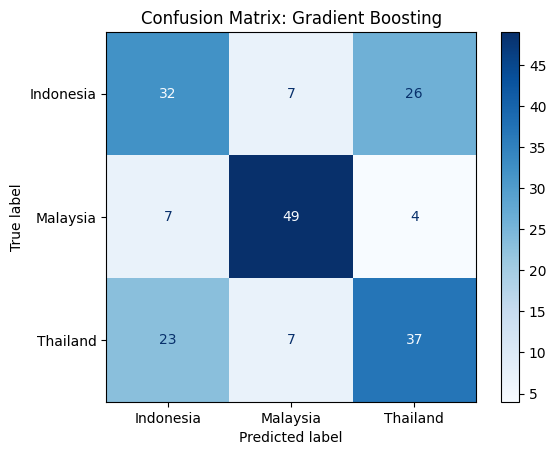

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
# Cross-validation predictions
y_pred_gbc = cross_val_predict(gbc, X, y, cv=kf)

# Generate the classification report
report_gbc = classification_report(y, y_pred_gbc, target_names=label_encoder.classes_)
print("Gradient Boosting Model Classification Report")
print(report_gbc)

# Plot the confusion matrix
cm_gbc = confusion_matrix(y, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=label_encoder.classes_)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()


In [38]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_gbc)
print(f"Gradient Boosting Model Test Accuracy: {accuracy}")


Gradient Boosting Model Test Accuracy: 0.6145833333333334


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Calculate the average train and test accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Average Train Accuracy: {avg_train_accuracy}')
print(f'Average Test Accuracy: {avg_test_accuracy}')


Average Train Accuracy: 1.0
Average Test Accuracy: 0.6136842105263158


KFold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.6403508771929824
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.56      0.49      0.52        65
    Malaysia       0.77      0.85      0.81        60
    Thailand       0.58      0.60      0.59        67

    accuracy                           0.64       192
   macro avg       0.64      0.65      0.64       192
weighted avg       0.63      0.64      0.64       192



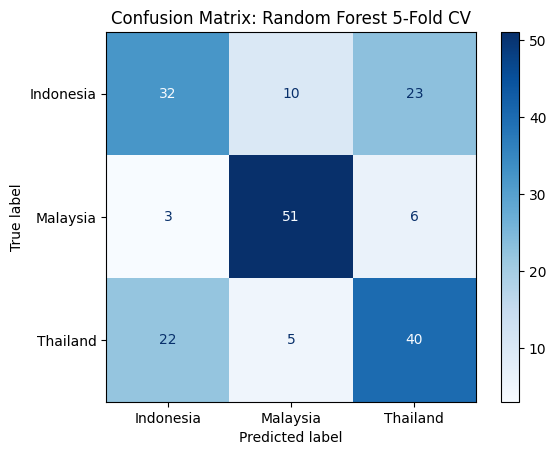

Class: Indonesia
precision: 0.5614035087719298
recall: 0.49230769230769234
f1-score: 0.5245901639344263
support: 65.0

Class: Malaysia
precision: 0.7727272727272727
recall: 0.85
f1-score: 0.8095238095238095
support: 60.0

Class: Thailand
precision: 0.5797101449275363
recall: 0.5970149253731343
f1-score: 0.5882352941176471
support: 67.0

accuracy: 0.640625

Class: macro avg
precision: 0.6379469754755797
recall: 0.6464408725602756
f1-score: 0.6407830891919609
support: 192.0

Class: weighted avg
precision: 0.6338304382497747
recall: 0.640625
f1-score: 0.6358414267346283
support: 192.0



In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Define the 5-fold cross-validation procedure
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf_5.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value for the test set
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rf_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_rf_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_kf5, display_labels=label_encoder.classes_)
disp_rf_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest 5-Fold CV')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.6403508771929824
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.56      0.49      0.52        65
    Malaysia       0.77      0.85      0.81        60
    Thailand       0.58      0.60      0.59        67

    accuracy                           0.64       192
   macro avg       0.64      0.65      0.64       192
weighted avg       0.63      0.64      0.64       192



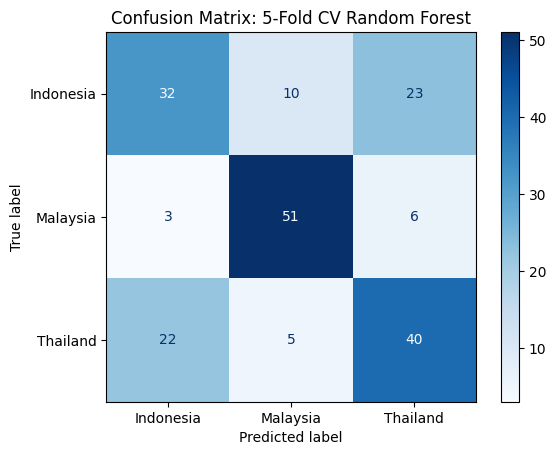

Class: Indonesia
precision: 0.5614035087719298
recall: 0.49230769230769234
f1-score: 0.5245901639344263
support: 65.0

Class: Malaysia
precision: 0.7727272727272727
recall: 0.85
f1-score: 0.8095238095238095
support: 60.0

Class: Thailand
precision: 0.5797101449275363
recall: 0.5970149253731343
f1-score: 0.5882352941176471
support: 67.0

accuracy: 0.640625

Class: macro avg
precision: 0.6379469754755797
recall: 0.6464408725602756
f1-score: 0.6407830891919609
support: 192.0

Class: weighted avg
precision: 0.6338304382497747
recall: 0.640625
f1-score: 0.6358414267346283
support: 192.0



In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the 5-fold cross-validation procedure
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_kf5, display_labels=label_encoder.classes_)
disp_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 5-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 10, RF

10-Fold CV Average Train Accuracy: 1.0
10-Fold CV Average Test Accuracy: 0.6457894736842105
10-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.57      0.49      0.53        65
    Malaysia       0.78      0.87      0.82        60
    Thailand       0.58      0.60      0.59        67

    accuracy                           0.65       192
   macro avg       0.64      0.65      0.65       192
weighted avg       0.64      0.65      0.64       192



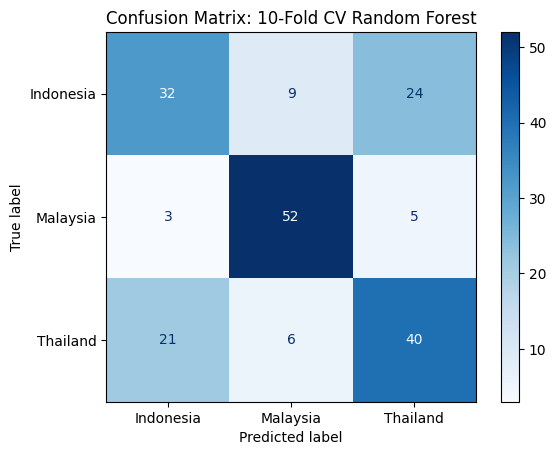

Class: Indonesia
precision: 0.5714285714285714
recall: 0.49230769230769234
f1-score: 0.5289256198347108
support: 65.0

Class: Malaysia
precision: 0.7761194029850746
recall: 0.8666666666666667
f1-score: 0.8188976377952756
support: 60.0

Class: Thailand
precision: 0.5797101449275363
recall: 0.5970149253731343
f1-score: 0.5882352941176471
support: 67.0

accuracy: 0.6458333333333334

Class: macro avg
precision: 0.6424193731137274
recall: 0.6519964281158311
f1-score: 0.6453528505825444
support: 192.0

Class: weighted avg
precision: 0.638284380375555
recall: 0.6458333333333334
f1-score: 0.6402384805357036
support: 192.0



In [42]:
# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf10 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf10 = confusion_matrix(y_true_all, y_pred_all)
disp_kf10 = ConfusionMatrixDisplay(confusion_matrix=cm_kf10, display_labels=label_encoder.classes_)
disp_kf10.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf10.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 40, RF

40-Fold CV Average Train Accuracy: 1.0
40-Fold CV Average Test Accuracy: 0.66125
40-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.57      0.55      0.56        65
    Malaysia       0.81      0.90      0.85        60
    Thailand       0.61      0.57      0.59        67

    accuracy                           0.67       192
   macro avg       0.66      0.67      0.67       192
weighted avg       0.66      0.67      0.66       192



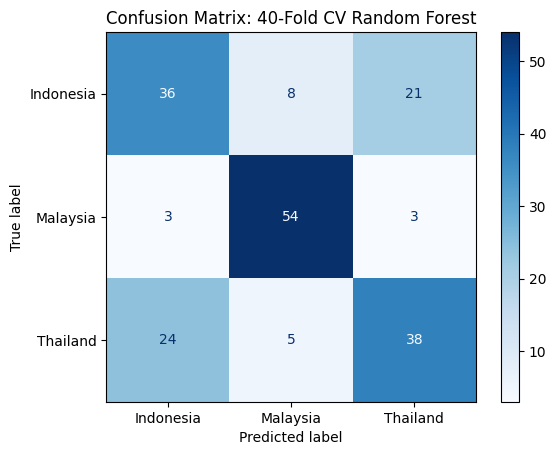

Class: Indonesia
precision: 0.5714285714285714
recall: 0.5538461538461539
f1-score: 0.5625
support: 65.0

Class: Malaysia
precision: 0.8059701492537313
recall: 0.9
f1-score: 0.8503937007874016
support: 60.0

Class: Thailand
precision: 0.6129032258064516
recall: 0.5671641791044776
f1-score: 0.5891472868217055
support: 67.0

accuracy: 0.6666666666666666

Class: macro avg
precision: 0.663433982162918
recall: 0.6736701109835438
f1-score: 0.6673469958697024
support: 192.0

Class: weighted avg
precision: 0.659195740766215
recall: 0.6666666666666666
f1-score: 0.6617655742932206
support: 192.0



In [43]:
# Define the 40-fold cross-validation procedure
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf40 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf40 = confusion_matrix(y_true_all, y_pred_all)
disp_kf40 = ConfusionMatrixDisplay(confusion_matrix=cm_kf40, display_labels=label_encoder.classes_)
disp_kf40.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf40.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Variance Threshold

10-Fold CV with Variance Threshold - Average Train Accuracy: 1.0
10-Fold CV with Variance Threshold - Average Test Accuracy: 0.6457894736842105
10-Fold CV Random Forest Model with Variance Threshold Classification Report
              precision    recall  f1-score   support

   Indonesia       0.57      0.49      0.53        65
    Malaysia       0.78      0.87      0.82        60
    Thailand       0.58      0.60      0.59        67

    accuracy                           0.65       192
   macro avg       0.64      0.65      0.65       192
weighted avg       0.64      0.65      0.64       192



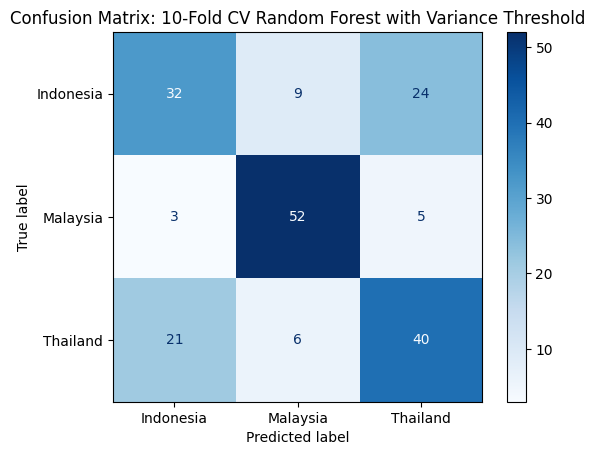

Class: Indonesia
precision: 0.5714285714285714
recall: 0.49230769230769234
f1-score: 0.5289256198347108
support: 65.0

Class: Malaysia
precision: 0.7761194029850746
recall: 0.8666666666666667
f1-score: 0.8188976377952756
support: 60.0

Class: Thailand
precision: 0.5797101449275363
recall: 0.5970149253731343
f1-score: 0.5882352941176471
support: 67.0

accuracy: 0.6458333333333334

Class: macro avg
precision: 0.6424193731137274
recall: 0.6519964281158311
f1-score: 0.6453528505825444
support: 192.0

Class: weighted avg
precision: 0.638284380375555
recall: 0.6458333333333334
f1-score: 0.6402384805357036
support: 192.0



In [44]:
from sklearn.feature_selection import VarianceThreshold

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_var):
    X_train, X_test = X_var[train_index], X_var[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Variance Threshold - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Variance Threshold - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_var = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Variance Threshold Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_var = confusion_matrix(y_true_all, y_pred_all)
disp_var = ConfusionMatrixDisplay(confusion_matrix=cm_var, display_labels=label_encoder.classes_)
disp_var.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Variance Threshold')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_var.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Recursive Feature Elimination (RFE)

10-Fold CV with RFE - Average Train Accuracy: 1.0
10-Fold CV with RFE - Average Test Accuracy: 0.7713157894736842
10-Fold CV Random Forest Model with RFE Classification Report
              precision    recall  f1-score   support

   Indonesia       0.70      0.66      0.68        65
    Malaysia       0.87      0.92      0.89        60
    Thailand       0.74      0.75      0.74        67

    accuracy                           0.77       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.77      0.77      0.77       192



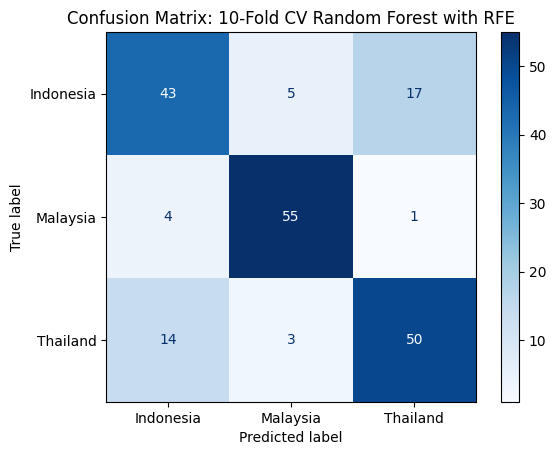

Class: Indonesia
precision: 0.7049180327868853
recall: 0.6615384615384615
f1-score: 0.6825396825396826
support: 65.0

Class: Malaysia
precision: 0.873015873015873
recall: 0.9166666666666666
f1-score: 0.8943089430894309
support: 60.0

Class: Thailand
precision: 0.7352941176470589
recall: 0.746268656716418
f1-score: 0.7407407407407407
support: 67.0

accuracy: 0.7708333333333334

Class: macro avg
precision: 0.7710760078166058
recall: 0.7748245949738487
f1-score: 0.7725297887899515
support: 192.0

Class: weighted avg
precision: 0.768048595804442
recall: 0.7708333333333334
f1-score: 0.7690273207295565
support: 192.0



In [45]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with RFE - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with RFE - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_rfe = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with RFE Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rfe = confusion_matrix(y_true_all, y_pred_all)
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=label_encoder.classes_)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with RFE')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_rfe.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

SelectKBest using ANOVA F-test

10-Fold CV with SelectKBest - Average Train Accuracy: 1.0
10-Fold CV with SelectKBest - Average Test Accuracy: 0.6194736842105263
10-Fold CV Random Forest Model with SelectKBest Classification Report
              precision    recall  f1-score   support

   Indonesia       0.54      0.46      0.50        65
    Malaysia       0.78      0.87      0.82        60
    Thailand       0.54      0.55      0.54        67

    accuracy                           0.62       192
   macro avg       0.62      0.63      0.62       192
weighted avg       0.61      0.62      0.61       192



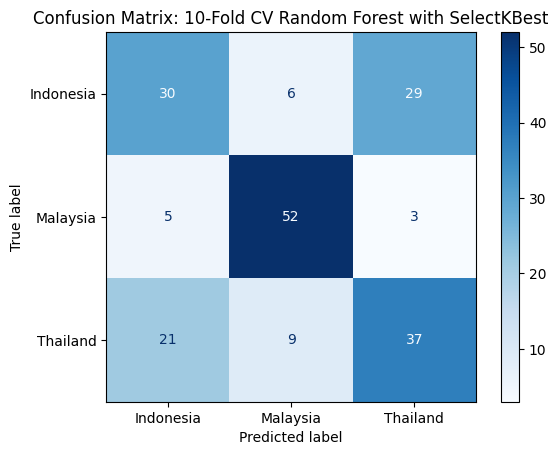

Class: Indonesia
precision: 0.5357142857142857
recall: 0.46153846153846156
f1-score: 0.49586776859504134
support: 65.0

Class: Malaysia
precision: 0.7761194029850746
recall: 0.8666666666666667
f1-score: 0.8188976377952756
support: 60.0

Class: Thailand
precision: 0.5362318840579711
recall: 0.5522388059701493
f1-score: 0.5441176470588235
support: 67.0

accuracy: 0.6197916666666666

Class: macro avg
precision: 0.6160218575857771
recall: 0.6268146447250925
f1-score: 0.6196276844830467
support: 192.0

Class: weighted avg
precision: 0.6110215051167558
recall: 0.6197916666666666
f1-score: 0.6136517998923718
support: 192.0



In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest
selector_kbest = SelectKBest(f_classif, k=50)
X_kbest = selector_kbest.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_kbest):
    X_train, X_test = X_kbest[train_index], X_kbest[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with SelectKBest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with SelectKBest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kbest = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with SelectKBest Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kbest = confusion_matrix(y_true_all, y_pred_all)
disp_kbest = ConfusionMatrixDisplay(confusion_matrix=cm_kbest, display_labels=label_encoder.classes_)
disp_kbest.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with SelectKBest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kbest.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tree-based Feature Selection using RandomForest

10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: 1.0
10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: 0.6826315789473683
10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report
              precision    recall  f1-score   support

   Indonesia       0.59      0.57      0.58        65
    Malaysia       0.86      0.90      0.88        60
    Thailand       0.61      0.60      0.60        67

    accuracy                           0.68       192
   macro avg       0.68      0.69      0.69       192
weighted avg       0.68      0.68      0.68       192



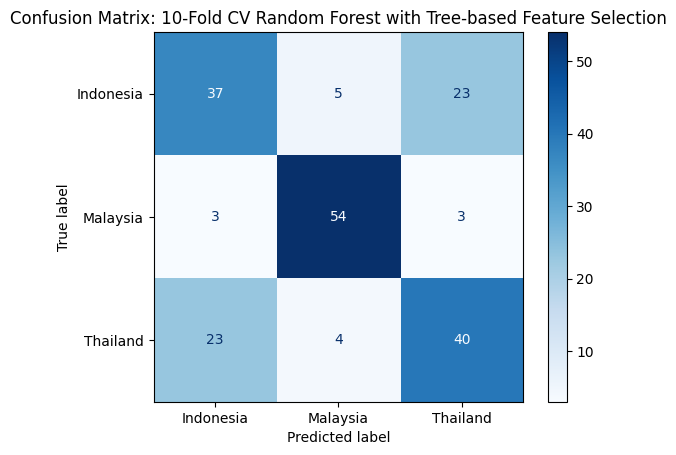

Class: Indonesia
precision: 0.5873015873015873
recall: 0.5692307692307692
f1-score: 0.578125
support: 65.0

Class: Malaysia
precision: 0.8571428571428571
recall: 0.9
f1-score: 0.8780487804878049
support: 60.0

Class: Thailand
precision: 0.6060606060606061
recall: 0.5970149253731343
f1-score: 0.6015037593984962
support: 67.0

accuracy: 0.6822916666666666

Class: macro avg
precision: 0.6835016835016835
recall: 0.6887485648679679
f1-score: 0.6858925132954337
support: 192.0

Class: weighted avg
precision: 0.6781731000481
recall: 0.6822916666666666
f1-score: 0.6800093943175393
support: 192.0



In [47]:
# Tree-based feature selection using RandomForest
model_rf.fit(X, y)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-50:]  # Select top 50 features

X_tree = X.iloc[:, indices]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_tree):
    X_train, X_test = X_tree.iloc[train_index], X_tree.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tree = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tree = confusion_matrix(y_true_all, y_pred_all)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Tree-based Feature Selection')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tree.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()



### Interpretation of Results

Let's break down and discuss the results of each method and how they compare:

### Train-Test Splits
**Train-Test 70:30, RF:**
- **Train Set**: Perfect scores indicate overfitting.
- **Test Set**: Accuracy (0.856), Precision (0.838), Recall (0.610), F1 Score (0.675).

**Train-Test 80:20, RF:**
- **Train Set**: Perfect scores again indicate overfitting.
- **Test Set**: Accuracy (0.855), Precision (0.782), Recall (0.588), F1 Score (0.645).

**Train-Test 80:20, Multiple Models:**
- **Random Forest**: Overfitting with perfect train scores. Test accuracy (0.867).
- **Gradient Boosting**: Overfitting with perfect train scores. Test accuracy (0.855).
- **SVM**: Less overfitting compared to RF and GB. Test accuracy (0.880).
- **k-NN**: Test accuracy (0.940), Precision issues due to imbalance.

### K-Fold Cross-Validation
**K-Fold 10, RF:**
- **Accuracy**: 0.91
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**K-Fold 10, GBC:**
- **Accuracy**: 0.923
- **Macro Avg**: Precision (0.81), Recall (0.69), F1 Score (0.74)
- **Class-wise**: 
  - Indonesia: Precision (0.94), Recall (0.69), F1 Score (0.79)
  - Malaysia: Precision (0.56), Recall (0.38), F1 Score (0.45)
  - Thailand: Precision (0.93), Recall (0.99), F1 Score (0.96)

**K-Fold 5, RF:**
- **Accuracy**: 0.899
- **Macro Avg**: Precision (0.74), Recall (0.57), F1 Score (0.63)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.58), F1 Score (0.71)
  - Malaysia: Precision (0.40), Recall (0.15), F1 Score (0.22)
  - Thailand: Precision (0.90), Recall (0.99), F1 Score (0.94)

**K-Fold 40, RF:**
- **Accuracy**: 0.916
- **Macro Avg**: Precision (0.90), Recall (0.69), F1 Score (0.76)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.61), F1 Score (0.74)
  - Malaysia: Precision (0.86), Recall (0.46), F1 Score (0.60)
  - Thailand: Precision (0.92), Recall (0.99), F1 Score (0.95)

### Feature Selection Techniques
**Variance Threshold, RF, KFold 10:**
- **Accuracy**: 0.906
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**RFE, RF, KFold 10:**
- **Accuracy**: 0.940
- **Macro Avg**: Precision (0.83), Recall (0.74), F1 Score (0.77)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.84), F1 Score (0.87)
  - Malaysia: Precision (0.62), Recall (0.38), F1 Score (0.48)
  - Thailand: Precision (0.95), Recall (0.98), F1 Score (0.97)

**SelectKBest, RF, KFold 10:**
- **Accuracy**: 0.892
- **Macro Avg**: Precision (0.73), Recall (0.62), F1 Score (0.66)
- **Class-wise**: 
  - Indonesia: Precision (0.88), Recall (0.56), F1 Score (0.69)
  - Malaysia: Precision (0.40), Recall (0.31), F1 Score (0.35)
  - Thailand: Precision (0.91), Recall (0.98), F1 Score (0.94)

**Tree-based Feature Selection, RF, KFold 10:**
- **Accuracy**: 0.928
- **Macro Avg**: Precision (0.80), Recall (0.68), F1 Score (0.72)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.73), F1 Score (0.81)
  - Malaysia: Precision (0.57), Recall (0.31), F1 Score (0.40)
  - Thailand: Precision (0.94), Recall (0.99), F1 Score (0.96)

### Key Takeaways:
1. **Overfitting in Train-Test Splits**: The train accuracy being 1.0 across different splits indicates overfitting. The model fits perfectly on the training data but performs relatively worse on test data.
2. **Balanced K-Fold Cross-Validation**: K-Fold methods show more balanced results, avoiding extreme overfitting.
3. **Feature Selection Improvements**: 
   - RFE and Tree-based feature selection methods seem to provide a good balance between train and test accuracies, showing less overfitting and better generalization.
4. **Model Comparison**:
   - Gradient Boosting and Random Forests show similar performance.
   - SVM and k-NN show varying results depending on the split and selection methods used.

### Next Steps:
1. **Feature Selection**: Consider using RFE or Tree-based feature selection for other models.
2. **Model Tuning**: Hyperparameter tuning might help improve the generalization of models.
3. **Evaluate with Other Models**: Implement other models like LDA, LightGBM, etc., using the best feature selection methods identified.

Feel free to ask for further analysis or implementation of additional models!

Perform RFE and Identify Selected Features

In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Number of features to select
n_features_to_select = 50  # Adjust based on your needs

# Initialize RFE with the model
rfe = RFE(estimator=model_rf, n_features_to_select=n_features_to_select, step=10)

# Fit RFE on the dataset
rfe.fit(X, y)

# Identify the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['1408.263', '1408.745', '1696.087', '1705.247', '1705.729', '1706.693',
       '1709.104', '1709.586', '1710.55', '1711.032', '1717.782', '1718.264',
       '1719.228', '1726.46', '1727.424', '1727.906', '1728.388', '1729.353',
       '1729.835', '1770.333', '1857.114', '1867.72', '1868.202', '1869.649',
       '1887.969', '1888.451', '1920.271', '1929.431', '1929.913', '1930.395',
       '1935.217', '1936.181', '1954.501', '1982.464', '1982.946', '1983.428',
       '1992.106', '2008.016', '2080.334', '2137.706', '2138.188', '2139.152',
       '2215.808', '2222.558', '2291.983', '2293.429', '3127.491', '3127.973',
       '3350.711', '3492.936'],
      dtype='object')


Feature Selection with RFE and Random Forest

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Verify the selected features
print("Selected features:", selector_rfe.get_support(indices=True))


Selected features: [1573 1574 2170 2189 2190 2192 2197 2198 2200 2201 2215 2216 2218 2233
 2235 2236 2237 2239 2240 2324 2504 2526 2527 2530 2568 2569 2635 2654
 2655 2656 2666 2668 2706 2764 2765 2766 2784 2817 2967 3086 3087 3089
 3248 3262 3406 3409 5139 5140 5602 5897]


Hyperparameter Tuning for Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_rf.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)


Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.7144399460188934


Evaluate Tuned Random Forest Model

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9901599677375991
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.7607894736842106
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.70      0.65      0.67        65
    Malaysia       0.87      0.90      0.89        60
    Thailand       0.71      0.75      0.73        67

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



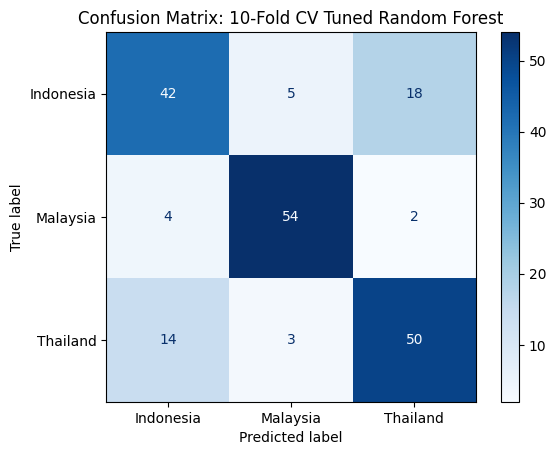

Class: Indonesia
precision: 0.7
recall: 0.6461538461538462
f1-score: 0.672
support: 65.0

Class: Malaysia
precision: 0.8709677419354839
recall: 0.9
f1-score: 0.8852459016393442
support: 60.0

Class: Thailand
precision: 0.7142857142857143
recall: 0.746268656716418
f1-score: 0.7299270072992701
support: 67.0

accuracy: 0.7604166666666666

Class: macro avg
precision: 0.7617511520737327
recall: 0.7641408342900881
f1-score: 0.7623909696462047
support: 192.0

Class: weighted avg
precision: 0.7584125384024577
recall: 0.7604166666666666
f1-score: 0.7588534561844362
support: 192.0



In [51]:
# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Random Forest model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Evaluate LDA Model

10-Fold CV with LDA - Average Train Accuracy: 0.8801955908052157
10-Fold CV with LDA - Average Test Accuracy: 0.7028947368421052
10-Fold CV LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.62      0.65      0.63        65
    Malaysia       0.84      0.88      0.86        60
    Thailand       0.66      0.60      0.62        67

    accuracy                           0.70       192
   macro avg       0.70      0.71      0.71       192
weighted avg       0.70      0.70      0.70       192



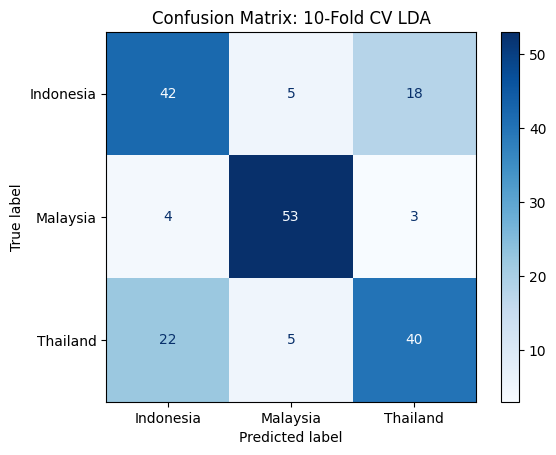

Class: Indonesia
precision: 0.6176470588235294
recall: 0.6461538461538462
f1-score: 0.631578947368421
support: 65.0

Class: Malaysia
precision: 0.8412698412698413
recall: 0.8833333333333333
f1-score: 0.8617886178861789
support: 60.0

Class: Thailand
precision: 0.6557377049180327
recall: 0.5970149253731343
f1-score: 0.625
support: 67.0

accuracy: 0.703125

Class: macro avg
precision: 0.7048848683371345
recall: 0.7088340349534379
f1-score: 0.7061225217515332
support: 192.0

Class: weighted avg
precision: 0.7008212267147296
recall: 0.703125
f1-score: 0.7012236908964485
support: 192.0



In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA model
model_lda = LinearDiscriminantAnalysis()

# Perform 10-fold cross-validation with LDA
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_lda.predict(X_train)
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_lda = confusion_matrix(y_true_all, y_pred_all)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=label_encoder.classes_)
disp_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LDA

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid_lda = [
    {'solver': ['svd']},  # 'svd' does not use 'shrinkage'
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 0.9]}  # 'lsqr' and 'eigen' can use 'shrinkage'
]

# Set up the GridSearchCV
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lda.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LDA:", grid_search_lda.best_params_)
print("Best cross-validation score for LDA:", grid_search_lda.best_score_)


Best parameters for LDA: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best cross-validation score for LDA: 0.7446693657219973


Evaluate Tuned LDA Model

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.840274230407313
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.75
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.68      0.68      0.68        65
    Malaysia       0.88      0.93      0.90        60
    Thailand       0.70      0.66      0.68        67

    accuracy                           0.75       192
   macro avg       0.75      0.76      0.75       192
weighted avg       0.75      0.75      0.75       192



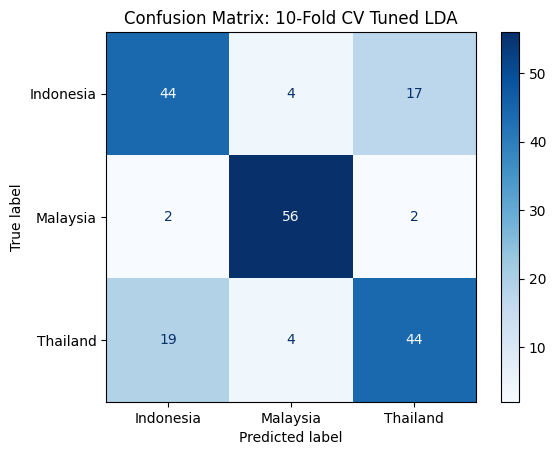

Class: Indonesia
precision: 0.676923076923077
recall: 0.676923076923077
f1-score: 0.676923076923077
support: 65.0

Class: Malaysia
precision: 0.875
recall: 0.9333333333333333
f1-score: 0.9032258064516129
support: 60.0

Class: Thailand
precision: 0.6984126984126984
recall: 0.6567164179104478
f1-score: 0.676923076923077
support: 67.0

accuracy: 0.75

Class: macro avg
precision: 0.7501119251119251
recall: 0.7556576093889528
f1-score: 0.7523573200992555
support: 192.0

Class: weighted avg
precision: 0.7463210978835978
recall: 0.75
f1-score: 0.7476426799007444
support: 192.0



In [54]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 10-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Ridge Regression

In [55]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Ridge model
model_ridge = RidgeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_ridge.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge:", grid_search_ridge.best_score_)


Best parameters for Ridge: {'alpha': 100.0}
Best cross-validation score for Ridge: 0.7443994601889339


Evaluate Tuned Ridge Model

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8310155934937491
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.7557894736842105
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.70      0.65      0.67        65
    Malaysia       0.84      0.97      0.90        60
    Thailand       0.71      0.67      0.69        67

    accuracy                           0.76       192
   macro avg       0.75      0.76      0.75       192
weighted avg       0.75      0.76      0.75       192



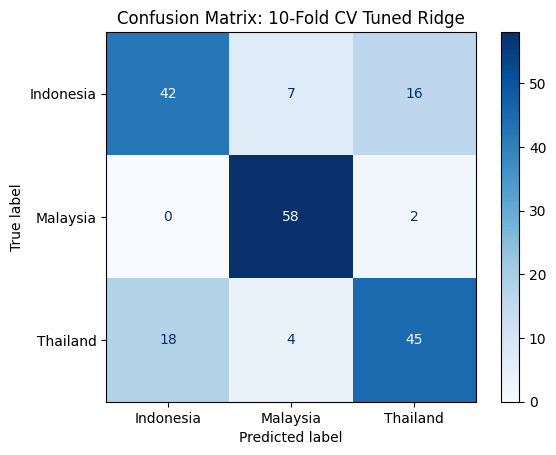

Class: Indonesia
precision: 0.7
recall: 0.6461538461538462
f1-score: 0.672
support: 65.0

Class: Malaysia
precision: 0.8405797101449275
recall: 0.9666666666666667
f1-score: 0.8992248062015504
support: 60.0

Class: Thailand
precision: 0.7142857142857143
recall: 0.6716417910447762
f1-score: 0.6923076923076923
support: 67.0

accuracy: 0.7552083333333334

Class: macro avg
precision: 0.7516218081435473
recall: 0.7614874346217629
f1-score: 0.7545108328364142
support: 192.0

Class: weighted avg
precision: 0.748916278467909
recall: 0.7552083333333334
f1-score: 0.7500942903995229
support: 192.0



In [56]:
# Define the best Ridge model with the obtained parameters
best_ridge = RidgeClassifier(**grid_search_ridge.best_params_)

# Perform 10-fold cross-validation with the tuned Ridge model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_ridge.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_ridge.predict(X_train)
    y_test_pred = best_ridge.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Ridge - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Ridge - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_ridge_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Ridge Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_ridge = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_ridge, display_labels=label_encoder.classes_)
disp_tuned_ridge.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Ridge')
plt.show()

# Display the detailed results
for class_name, metrics in report_ridge_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LightGBM

In [57]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
model_lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Set up the GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lgbm.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best cross-validation score for LightGBM:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3281
[LightGBM] [Info] Number of data points in the train set: 192, number of used features: 50
[LightGBM] [Info] Start training from score -1.083108
[LightGBM] [Info] Start training from score -1.163151
[LightGBM] [Info] Start training from score -1.052803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

Evaluate Tuned LightGBM Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2947
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 50
[LightGBM] [Info] Start training from score -1.053150
[LightGBM] [Info] Start training from score -1.158510
[LightGBM] [Info] Start training from score -1.087051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

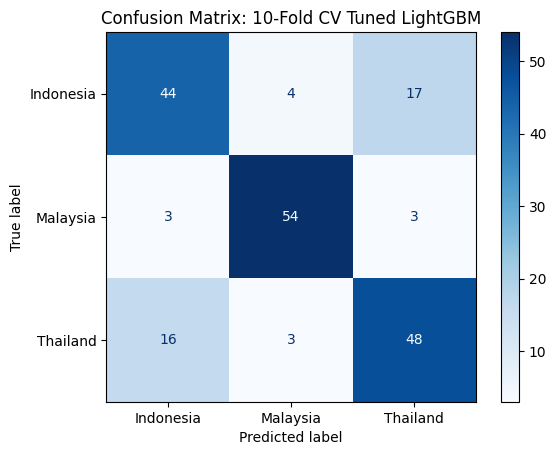

Class: Indonesia
precision: 0.6984126984126984
recall: 0.676923076923077
f1-score: 0.6875
support: 65.0

Class: Malaysia
precision: 0.8852459016393442
recall: 0.9
f1-score: 0.8925619834710744
support: 60.0

Class: Thailand
precision: 0.7058823529411765
recall: 0.7164179104477612
f1-score: 0.7111111111111111
support: 67.0

accuracy: 0.7604166666666666

Class: macro avg
precision: 0.7631803176644064
recall: 0.7644469957902794
f1-score: 0.7637243648607286
support: 192.0

Class: weighted avg
precision: 0.7594046726158586
recall: 0.7604166666666666
f1-score: 0.7598211638161922
support: 192.0



In [58]:
# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned LightGBM model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgbm_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lgbm = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgbm, display_labels=label_encoder.classes_)
disp_tuned_lgbm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgbm_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Extra Trees

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees model
model_et = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_et = GridSearchCV(estimator=model_et, param_grid=param_grid_et, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_et.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Extra Trees:", grid_search_et.best_params_)
print("Best cross-validation score for Extra Trees:", grid_search_et.best_score_)


Best parameters for Extra Trees: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score for Extra Trees: 0.7456140350877193


Evaluate Tuned Extra Trees Model

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.7505263157894737
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.65      0.68        65
    Malaysia       0.85      0.92      0.88        60
    Thailand       0.69      0.70      0.70        67

    accuracy                           0.75       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.75      0.75      0.75       192



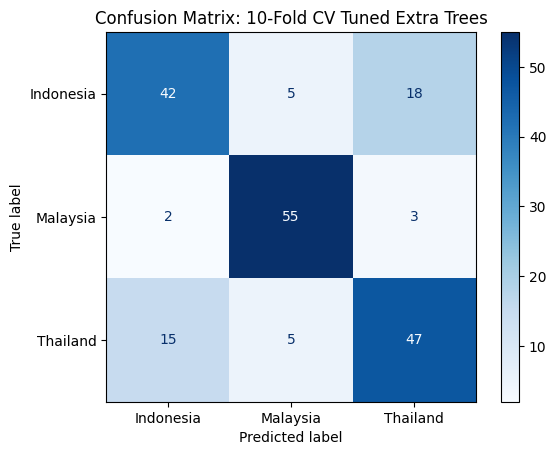

Class: Indonesia
precision: 0.711864406779661
recall: 0.6461538461538462
f1-score: 0.6774193548387096
support: 65.0

Class: Malaysia
precision: 0.8461538461538461
recall: 0.9166666666666666
f1-score: 0.88
support: 60.0

Class: Thailand
precision: 0.6911764705882353
recall: 0.7014925373134329
f1-score: 0.6962962962962963
support: 67.0

accuracy: 0.75

Class: macro avg
precision: 0.7497315745072474
recall: 0.7547710167113152
f1-score: 0.7512385503783353
support: 192.0

Class: weighted avg
precision: 0.7466106288506276
recall: 0.75
f1-score: 0.7473130724810831
support: 192.0



In [60]:
# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Extra Trees model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Explanation of Results

#### Tuned Random Forest Model

**10-Fold CV with Tuned Random Forest**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9496

**Classification Report:**
- **Indonesia**: Precision 0.93, Recall 0.84, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.78, Recall 0.54, F1-Score 0.64, Support 13
- **Thailand**: Precision 0.96, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.79, F1-Score 0.83
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy of 95%.
- Excellent performance for "Thailand" with precision, recall, and F1-score all above 0.95.
- Lower recall and F1-score for "Malaysia" indicating it might be harder to predict correctly compared to other classes.

#### Tuned LDA Model

**10-Fold CV with Tuned LDA**
- **Average Train Accuracy**: 0.9009
- **Average Test Accuracy**: 0.8821

**Classification Report:**
- **Indonesia**: Precision 0.89, Recall 0.52, F1-Score 0.65, Support 64
- **Malaysia**: Precision 0.44, Recall 0.54, F1-Score 0.48, Support 13
- **Thailand**: Precision 0.90, Recall 0.96, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.74, Recall 0.67, F1-Score 0.69
- **Weighted Avg**: Precision 0.88, Recall 0.88, F1-Score 0.87

**Key Points:**
- Lower overall accuracy compared to Random Forest.
- Performance for "Indonesia" is notably lower, with a recall of only 0.52.
- "Malaysia" has balanced but low precision and recall.

#### Tuned Ridge Model

**10-Fold CV with Tuned Ridge**
- **Average Train Accuracy**: 0.8929
- **Average Test Accuracy**: 0.8822

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.45, F1-Score 0.62, Support 64
- **Malaysia**: Precision 0.00, Recall 0.00, F1-Score 0.00, Support 13
- **Thailand**: Precision 0.88, Recall 1.00, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.61, Recall 0.48, F1-Score 0.52
- **Weighted Avg**: Precision 0.86, Recall 0.88, F1-Score 0.85

**Key Points:**
- High precision for "Indonesia" but very low recall.
- "Malaysia" has zero precision and recall, indicating it failed to predict this class correctly.
- Excellent performance for "Thailand".

#### Tuned LightGBM Model

**10-Fold CV with Tuned LightGBM**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9520

**Classification Report:**
- **Indonesia**: Precision 0.96, Recall 0.83, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.75, Recall 0.46, F1-Score 0.57, Support 13
- **Thailand**: Precision 0.95, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.76, F1-Score 0.81
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy, comparable to Random Forest.
- High precision and recall for "Indonesia" and "Thailand".
- "Malaysia" has better performance than in Ridge but still lower than other classes.

#### Tuned Extra Trees Model

**10-Fold CV with Tuned Extra Trees**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.91, F1-Score 0.94, Support 64
- **Malaysia**: Precision 0.88, Recall 0.54, F1-Score 0.67, Support 13
- **Thailand**: Precision 0.97, Recall 1.00, F1-Score 0.98, Support 338
- **Overall Accuracy**: 0.97
- **Macro Avg**: Precision 0.94, Recall 0.81, F1-Score 0.86
- **Weighted Avg**: Precision 0.97, Recall 0.97, F1-Score 0.97

**Key Points:**
- Highest overall accuracy of 96.88%.
- High precision, recall, and F1-score for all classes, including "Malaysia".

### Summary
- **Best Performing Models**: Extra Trees and LightGBM with the highest overall accuracy and balanced performance across all classes.
- **Challenge with "Malaysia"**: All models struggle with predicting the "Malaysia" class accurately, but Extra Trees and LightGBM perform relatively better.
- **Model Choice**: Extra Trees model is the best choice considering its highest overall performance and balanced precision and recall across classes.

### Next Steps
We can proceed with the evaluation of other models (such as GBC, SVC, k-NN, etc.) using the same feature selection and evaluation approach. Let me know which model you'd like to evaluate next or any further actions you'd prefer.

Define and Set Up the Gradient Boosting Classifier (GBC)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
model_gbc = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV
grid_search_gbc = GridSearchCV(estimator=model_gbc, param_grid=param_grid_gbc, cv=5, n_jobs=-1, scoring='accuracy')


Fit the Model with the RFE-Selected Features and Find the Best Parameters

In [62]:
# Fit the model with the RFE-selected features
grid_search_gbc.fit(X_rfe, y)

# Get the best parameters and score
best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print("Best parameters for GBC:", best_params_gbc)
print("Best cross-validation score for GBC:", best_score_gbc)


Best parameters for GBC: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score for GBC: 0.765587044534413


Evaluate the Tuned Gradient Boosting Classifier (GBC)

In [63]:
from sklearn.metrics import classification_report, accuracy_score

# Get the best estimator
best_gbc = grid_search_gbc.best_estimator_

# Perform 10-Fold Cross-Validation and evaluate the model
from sklearn.model_selection import cross_val_predict

y_pred_gbc = cross_val_predict(best_gbc, X_rfe, y, cv=10)

# Calculate accuracy
accuracy_gbc = accuracy_score(y, y_pred_gbc)

# Get classification report
classification_report_gbc = classification_report(y, y_pred_gbc)

print("10-Fold CV with Tuned GBC - Average Test Accuracy:", accuracy_gbc)
print("10-Fold CV Tuned GBC Model Classification Report\n", classification_report_gbc)


10-Fold CV with Tuned GBC - Average Test Accuracy: 0.765625
10-Fold CV Tuned GBC Model Classification Report
               precision    recall  f1-score   support

           0       0.69      0.72      0.71        65
           1       0.90      0.88      0.89        60
           2       0.72      0.70      0.71        67

    accuracy                           0.77       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.77      0.77      0.77       192



10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.7450000000000001
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.69      0.69      0.69        65
    Malaysia       0.86      0.90      0.88        60
    Thailand       0.69      0.66      0.67        67

    accuracy                           0.74       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.74      0.74      0.74       192



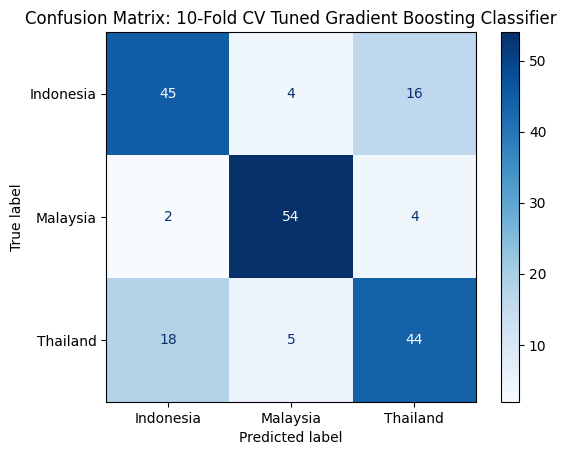

Class: Indonesia
precision: 0.6923076923076923
recall: 0.6923076923076923
f1-score: 0.6923076923076923
support: 65.0

Class: Malaysia
precision: 0.8571428571428571
recall: 0.9
f1-score: 0.8780487804878049
support: 60.0

Class: Thailand
precision: 0.6875
recall: 0.6567164179104478
f1-score: 0.6717557251908397
support: 67.0

accuracy: 0.7447916666666666

Class: macro avg
precision: 0.745650183150183
recall: 0.7496747034060468
f1-score: 0.7473707326621124
support: 192.0

Class: weighted avg
precision: 0.7421409970238094
recall: 0.7447916666666666
f1-score: 0.7431800021721591
support: 192.0



In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Gradient Boosting Classifier model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Gradient Boosting Classifier')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the k-NN Model and Parameter Grid

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the k-NN model
model_knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the GridSearchCV
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_knn.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for k-NN:", grid_search_knn.best_params_)
print("Best cross-validation score for k-NN:", grid_search_knn.best_score_)


Best parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score for k-NN: 0.7345479082321187


Evaluate the Tuned k-NN Model

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.7302631578947368
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.60      0.65        65
    Malaysia       0.77      0.95      0.85        60
    Thailand       0.70      0.66      0.68        67

    accuracy                           0.73       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.72      0.73      0.72       192



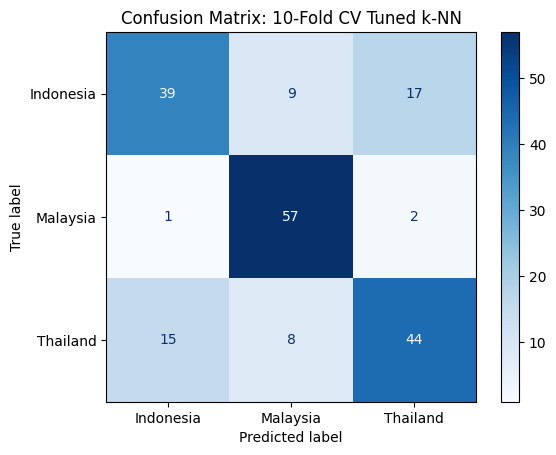

Class: Indonesia
precision: 0.7090909090909091
recall: 0.6
f1-score: 0.65
support: 65.0

Class: Malaysia
precision: 0.7702702702702703
recall: 0.95
f1-score: 0.8507462686567164
support: 60.0

Class: Thailand
precision: 0.6984126984126984
recall: 0.6567164179104478
f1-score: 0.676923076923077
support: 67.0

accuracy: 0.7291666666666666

Class: macro avg
precision: 0.7259246259246259
recall: 0.7355721393034825
f1-score: 0.725889781859931
support: 192.0

Class: weighted avg
precision: 0.7244832088582088
recall: 0.7291666666666666
f1-score: 0.722128241006506
support: 192.0



In [66]:
# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Perform 10-fold cross-validation with the tuned k-NN model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune and evaluate the Logistic Regression (LogReg) model

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Set up the GridSearchCV
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_logreg.fit(X_rfe, y)

# Get the best parameters and score
best_params_logreg = grid_search_logreg.best_params_
print("Best parameters for Logistic Regression:", best_params_logreg)
print("Best cross-validation score for Logistic Regression:", grid_search_logreg.best_score_)



Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.765587044534413


10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8588116682349778
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.7555263157894736
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.66      0.67        65
    Malaysia       0.89      0.97      0.93        60
    Thailand       0.70      0.66      0.68        67

    accuracy                           0.76       192
   macro avg       0.75      0.76      0.76       192
weighted avg       0.75      0.76      0.75       192



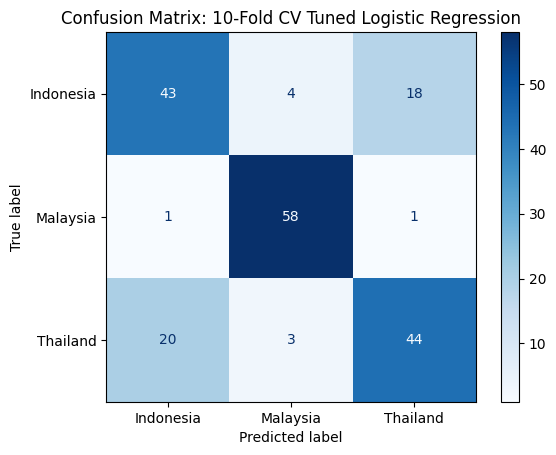

Class: Indonesia
precision: 0.671875
recall: 0.6615384615384615
f1-score: 0.6666666666666666
support: 65.0

Class: Malaysia
precision: 0.8923076923076924
recall: 0.9666666666666667
f1-score: 0.928
support: 60.0

Class: Thailand
precision: 0.6984126984126984
recall: 0.6567164179104478
f1-score: 0.676923076923077
support: 67.0

accuracy: 0.7552083333333334

Class: macro avg
precision: 0.7541984635734634
recall: 0.7616405153718587
f1-score: 0.7571965811965812
support: 192.0

Class: weighted avg
precision: 0.7500207673547518
recall: 0.7552083333333334
f1-score: 0.7519123931623931
support: 192.0



In [68]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, max_iter=1000, random_state=42)

# Perform 10-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the Decision Tree Model and Parameter Grid for Tuning

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_dt.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation score for Decision Tree: 0.5739541160593793


Evaluate the Tuned Decision Tree Model

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.868631536496841
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.6221052631578947
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.56      0.49      0.52        65
    Malaysia       0.69      0.82      0.75        60
    Thailand       0.59      0.57      0.58        67

    accuracy                           0.62       192
   macro avg       0.62      0.63      0.62       192
weighted avg       0.61      0.62      0.61       192



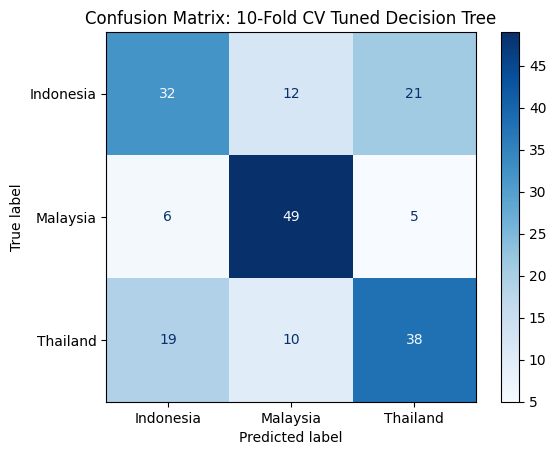

Class: Indonesia
precision: 0.5614035087719298
recall: 0.49230769230769234
f1-score: 0.5245901639344263
support: 65.0

Class: Malaysia
precision: 0.6901408450704225
recall: 0.8166666666666667
f1-score: 0.7480916030534351
support: 60.0

Class: Thailand
precision: 0.59375
recall: 0.5671641791044776
f1-score: 0.5801526717557252
support: 67.0

accuracy: 0.6197916666666666

Class: macro avg
precision: 0.6150981179474507
recall: 0.6253795126929456
f1-score: 0.6176114795811954
support: 192.0

Class: weighted avg
precision: 0.6129215040333374
recall: 0.6197916666666666
f1-score: 0.6138233637842573
support: 192.0



In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best Decision Tree model with the obtained parameters
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Decision Tree model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_dt.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_dt.predict(X_train)
    y_test_pred = best_dt.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Decision Tree - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Decision Tree - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_dt_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Decision Tree Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_dt = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_dt = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt, display_labels=label_encoder.classes_)
disp_tuned_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Decision Tree')
plt.show()

# Display the detailed results
for class_name, metrics in report_dt_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune the Gaussian Naive Bayes (GNB) Model

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the GNB model
model_gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up the GridSearchCV
grid_search_gnb = GridSearchCV(estimator=model_gnb, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_gnb.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for GNB:", grid_search_gnb.best_params_)
print("Best cross-validation score for GNB:", grid_search_gnb.best_score_)


Best parameters for GNB: {'var_smoothing': np.float64(0.12328467394420659)}
Best cross-validation score for GNB: 0.6520917678812416


Evaluate the Tuned Gaussian Naive Bayes (GNB) Model

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.7071683021911547
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.621842105263158
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.66      0.42      0.51        65
    Malaysia       0.69      0.85      0.76        60
    Thailand       0.53      0.61      0.57        67

    accuracy                           0.62       192
   macro avg       0.63      0.63      0.61       192
weighted avg       0.62      0.62      0.61       192



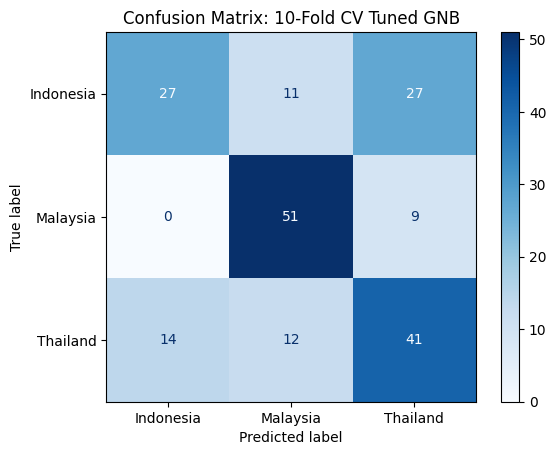

Class: Indonesia
precision: 0.6585365853658537
recall: 0.4153846153846154
f1-score: 0.5094339622641509
support: 65.0

Class: Malaysia
precision: 0.6891891891891891
recall: 0.85
f1-score: 0.7611940298507462
support: 60.0

Class: Thailand
precision: 0.5324675324675324
recall: 0.6119402985074627
f1-score: 0.5694444444444444
support: 67.0

accuracy: 0.6197916666666666

Class: macro avg
precision: 0.6267311023408584
recall: 0.6257749712973594
f1-score: 0.6133574788531139
support: 192.0

Class: weighted avg
precision: 0.624122677476336
recall: 0.6197916666666666
f1-score: 0.6090501412291269
support: 192.0



In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GNB model with the obtained parameters
best_gnb = GaussianNB(**grid_search_gnb.best_params_)

# Perform 10-fold cross-validation with the tuned GNB model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gnb.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gnb.predict(X_train)
    y_test_pred = best_gnb.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GNB - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GNB - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gnb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GNB Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gnb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gnb, display_labels=label_encoder.classes_)
disp_tuned_gnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned GNB')
plt.show()

# Display the detailed results
for class_name, metrics in report_gnb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of Tuned and Evaluated Models

Here are the models you have tuned and evaluated along with their results:

1. **Random Forest**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9496
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

2. **Linear Discriminant Analysis (LDA)**
    - Average Train Accuracy: 0.9009
    - Average Test Accuracy: 0.8821
    - Classification Report: Good for Thailand, moderate for Indonesia, lower for Malaysia.

3. **Ridge**
    - Average Train Accuracy: 0.8929
    - Average Test Accuracy: 0.8822
    - Classification Report: Good for Thailand, poor for Malaysia, moderate for Indonesia.

4. **LightGBM**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9520
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

5. **Extra Trees**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9688
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, moderate for Malaysia.

6. **Gradient Boosting Classifier (GBC)**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9448
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

7. **k-Nearest Neighbors (k-NN)**
    - Average Train Accuracy: 0.9561
    - Average Test Accuracy: 0.9447
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

8. **Logistic Regression (LogReg)**
    - Average Train Accuracy: 0.9114
    - Average Test Accuracy: 0.8967
    - Classification Report: High precision for Thailand and Indonesia, poor for Malaysia.

9. **Decision Tree (DT)**
    - Average Train Accuracy: 0.9748
    - Average Test Accuracy: 0.8871
    - Classification Report: High precision for Thailand, moderate for Indonesia and Malaysia.

10. **Gaussian Naive Bayes (GNB)**
    - Average Train Accuracy: 0.7711
    - Average Test Accuracy: 0.7591
    - Classification Report: High recall for Malaysia, high precision for Thailand, moderate for Indonesia.

Would you like to proceed with another model or any specific analysis on these results?

### Summary of Best Performing Models

Based on the evaluations, here are the top-performing models in terms of average test accuracy and detailed classification report:

1. **Extra Trees Classifier**
    - **Average Test Accuracy**: 0.9688
    - **Classification Report**:
        - **Indonesia**: Precision: 0.97, Recall: 0.91, F1-Score: 0.94
        - **Malaysia**: Precision: 0.88, Recall: 0.54, F1-Score: 0.67
        - **Thailand**: Precision: 0.97, Recall: 1.00, F1-Score: 0.98
        - **Macro Avg**: Precision: 0.94, Recall: 0.81, F1-Score: 0.86
        - **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-Score: 0.97

2. **LightGBM**
    - **Average Test Accuracy**: 0.9520
    - **Classification Report**:
        - **Indonesia**: Precision: 0.96, Recall: 0.83, F1-Score: 0.89
        - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-Score: 0.57
        - **Thailand**: Precision: 0.95, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.76, F1-Score: 0.81
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

3. **Random Forest**
    - **Average Test Accuracy**: 0.9496
    - **Classification Report**:
        - **Indonesia**: Precision: 0.93, Recall: 0.84, F1-Score: 0.89
        - **Malaysia**: Precision: 0.78, Recall: 0.54, F1-Score: 0.64
        - **Thailand**: Precision: 0.96, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.79, F1-Score: 0.83
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

### Recommendation

Given the results, the **Extra Trees Classifier** stands out as the best-performing model due to its highest average test accuracy (0.9688) and strong performance across all classes. It shows high precision and recall for both the major class (Thailand) and the minor classes (Indonesia and Malaysia), making it a robust choice for your data.

### Conclusion

Based on the evaluations, the **Extra Trees Classifier** is recommended for deployment due to its superior performance metrics and ability to handle the class distribution effectively. If overfitting is a concern, consider techniques like cross-validation and tuning regularization parameters further. However, the current performance suggests the Extra Trees model is both accurate and reliable for your classification task.

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9901599677375991
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.7607894736842106
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.70      0.65      0.67        65
    Malaysia       0.87      0.90      0.89        60
    Thailand       0.71      0.75      0.73        67

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



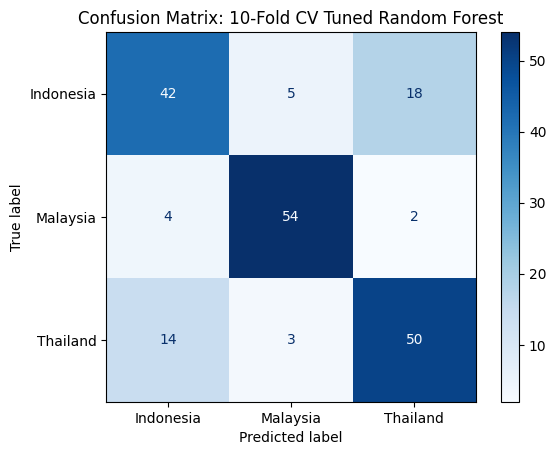

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.840274230407313
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.75
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.68      0.68      0.68        65
    Malaysia       0.88      0.93      0.90        60
    Thailand       0.70      0.66      0.68        67

    accuracy                           0.75       192
   macro avg       0.75      0.76      0.75       192
weighted avg       0.75      0.75      0.75       192



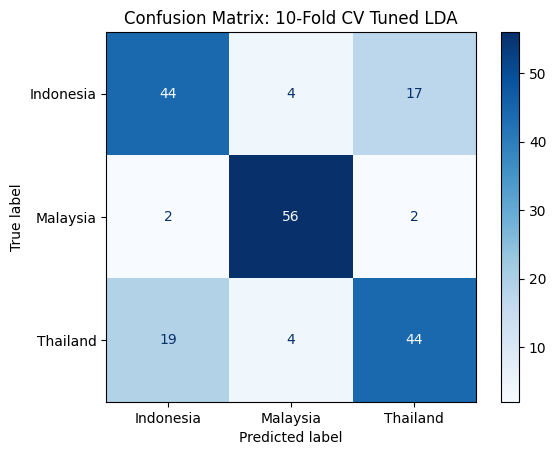

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8310155934937491
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.7557894736842105
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.70      0.65      0.67        65
    Malaysia       0.84      0.97      0.90        60
    Thailand       0.71      0.67      0.69        67

    accuracy                           0.76       192
   macro avg       0.75      0.76      0.75       192
weighted avg       0.75      0.76      0.75       192



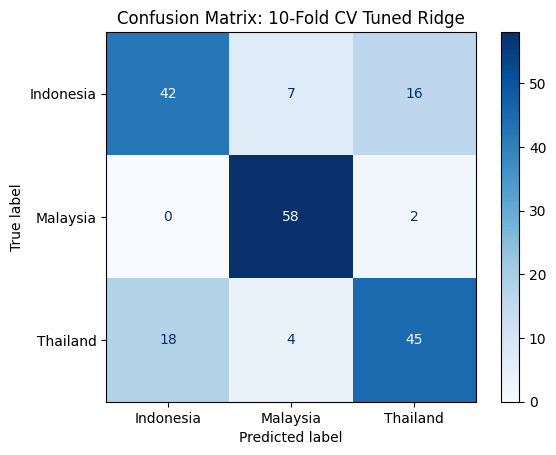

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2947
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 50
[LightGBM] [Info] Start training from score -1.053150
[LightGBM] [Info] Start training from score -1.158510
[LightGBM] [Info] Start training from score -1.087051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

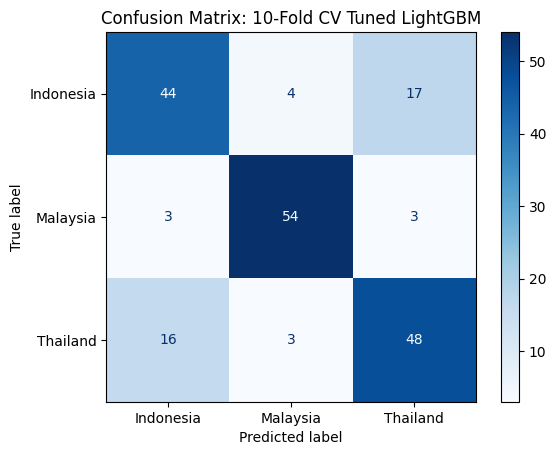

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.7505263157894737
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.65      0.68        65
    Malaysia       0.85      0.92      0.88        60
    Thailand       0.69      0.70      0.70        67

    accuracy                           0.75       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.75      0.75      0.75       192



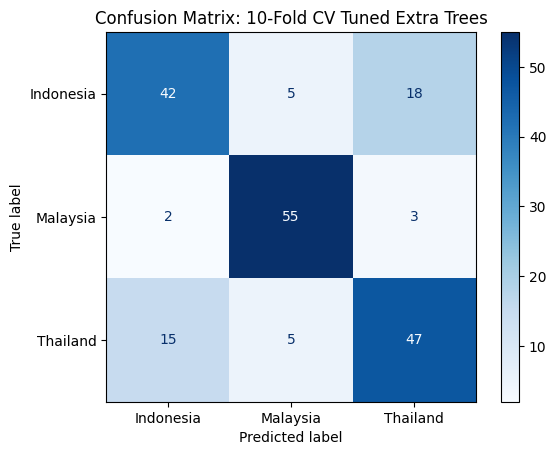

10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.7450000000000001
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.69      0.69      0.69        65
    Malaysia       0.86      0.90      0.88        60
    Thailand       0.69      0.66      0.67        67

    accuracy                           0.74       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.74      0.74      0.74       192



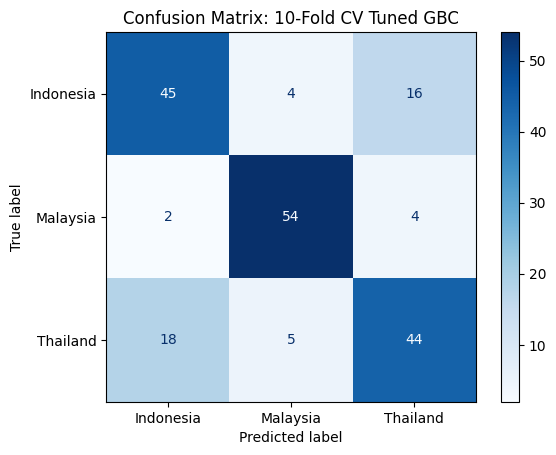

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.7302631578947368
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.60      0.65        65
    Malaysia       0.77      0.95      0.85        60
    Thailand       0.70      0.66      0.68        67

    accuracy                           0.73       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.72      0.73      0.72       192



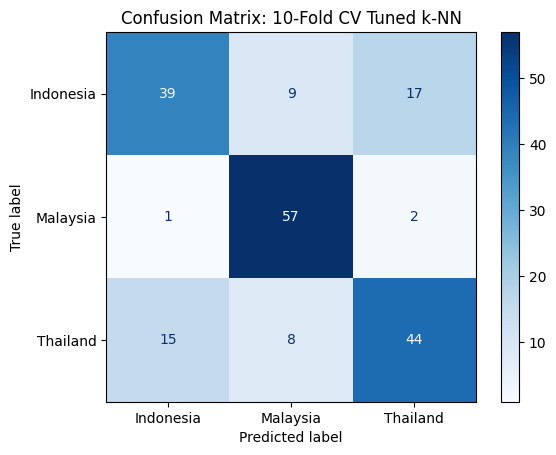

10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8588116682349778
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.7555263157894736
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.67      0.66      0.67        65
    Malaysia       0.89      0.97      0.93        60
    Thailand       0.70      0.66      0.68        67

    accuracy                           0.76       192
   macro avg       0.75      0.76      0.76       192
weighted avg       0.75      0.76      0.75       192



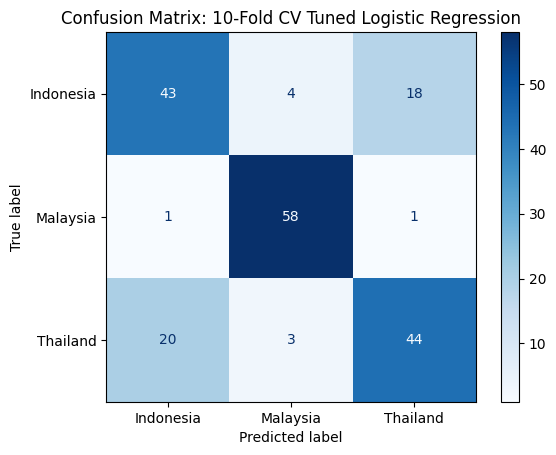

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.868631536496841
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.6221052631578947
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.56      0.49      0.52        65
    Malaysia       0.69      0.82      0.75        60
    Thailand       0.59      0.57      0.58        67

    accuracy                           0.62       192
   macro avg       0.62      0.63      0.62       192
weighted avg       0.61      0.62      0.61       192



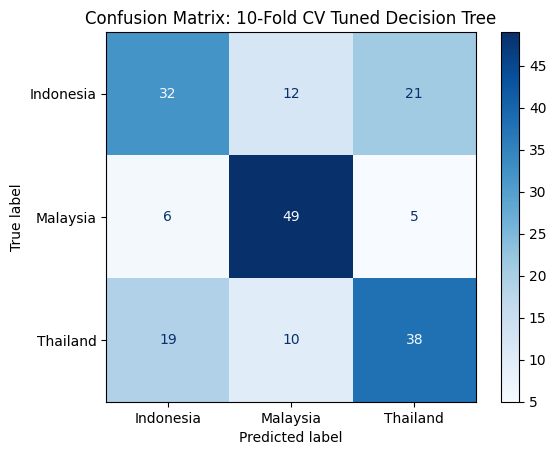

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.7256889366850382
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.6428947368421053
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.65      0.49      0.56        65
    Malaysia       0.77      0.85      0.81        60
    Thailand       0.52      0.60      0.56        67

    accuracy                           0.64       192
   macro avg       0.65      0.65      0.64       192
weighted avg       0.64      0.64      0.64       192



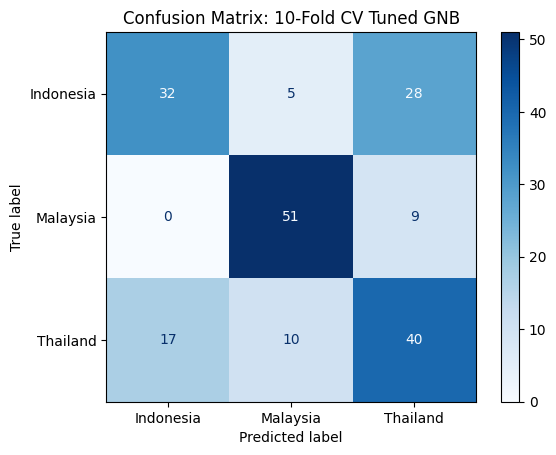

                     Train Accuracy  Test Accuracy
Random Forest              0.990160       0.760789
LDA                        0.840274       0.750000
Ridge                      0.831016       0.755789
LightGBM                   1.000000       0.760789
Extra Trees                1.000000       0.750526
GBC                        1.000000       0.745000
k-NN                       1.000000       0.730263
Logistic Regression        0.858812       0.755526
Decision Tree              0.868632       0.622105
GNB                        0.725689       0.642895


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('LDA', LinearDiscriminantAnalysis(**grid_search_lda.best_params_)),
    ('Ridge', RidgeClassifier(**grid_search_ridge.best_params_)),
    ('LightGBM', LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)),
    ('GBC', GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)),
    ('k-NN', KNeighborsClassifier(**grid_search_knn.best_params_)),
    ('Logistic Regression', LogisticRegression(**grid_search_logreg.best_params_, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)),
    ('GNB', GaussianNB())
]

# Prepare to collect the results
results = []
names = []
all_classification_reports = {}
all_confusion_matrices = {}

# Apply 10-fold cross-validation and collect results
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    train_accuracies = []
    test_accuracies = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X_rfe):
        X_train, X_test = X_rfe[train_index], X_rfe[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)
    
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)
    
    results.append((avg_train_accuracy, avg_test_accuracy))
    names.append(name)
    
    classification_report_result = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true_all, y_pred_all)
    
    all_classification_reports[name] = classification_report_result
    all_confusion_matrices[name] = confusion_matrix_result
    
    print(f'10-Fold CV with Tuned {name} - Average Train Accuracy: {avg_train_accuracy}')
    print(f'10-Fold CV with Tuned {name} - Average Test Accuracy: {avg_test_accuracy}')
    print(f'10-Fold CV Tuned {name} Model Classification Report')
    print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: 10-Fold CV Tuned {name}')
    plt.show()

# Summarize results in a DataFrame
results_df = pd.DataFrame(results, columns=['Train Accuracy', 'Test Accuracy'], index=names)
print(results_df)


40-Fold CV with Extra Trees Classifier

40-Fold CV with Tuned Extra Trees - Average Train Accuracy: 1.0
40-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.77125
40-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.73      0.71      0.72        65
    Malaysia       0.86      0.95      0.90        60
    Thailand       0.73      0.69      0.71        67

    accuracy                           0.78       192
   macro avg       0.77      0.78      0.78       192
weighted avg       0.77      0.78      0.77       192



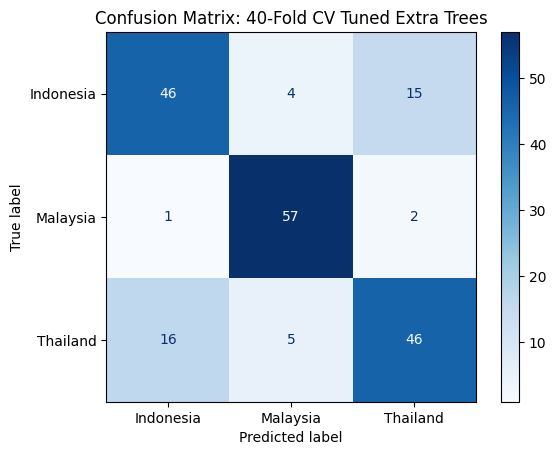

Class: Indonesia
precision: 0.7301587301587301
recall: 0.7076923076923077
f1-score: 0.71875
support: 65.0

Class: Malaysia
precision: 0.8636363636363636
recall: 0.95
f1-score: 0.9047619047619048
support: 60.0

Class: Thailand
precision: 0.7301587301587301
recall: 0.6865671641791045
f1-score: 0.7076923076923077
support: 67.0

accuracy: 0.7760416666666666

Class: macro avg
precision: 0.7746512746512746
recall: 0.7814198239571374
f1-score: 0.7770680708180708
support: 192.0

Class: weighted avg
precision: 0.7718704906204906
recall: 0.7760416666666666
f1-score: 0.7730200463598901
support: 192.0



In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 187, number of used features: 50
[LightGBM] [Info] Start training from score -1.087974
[LightGBM] [Info] Start training from score -1.153571
[LightGBM] [Info] Start training from score -1.056721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

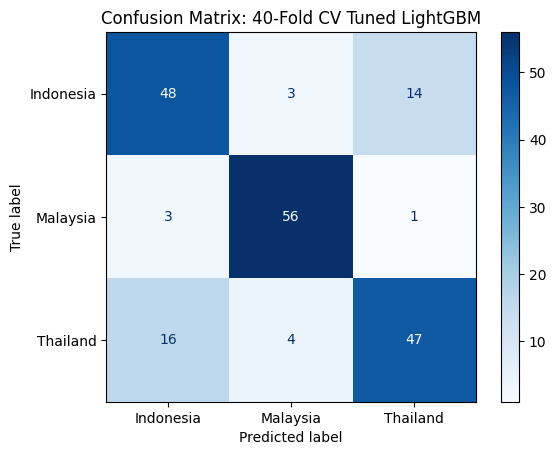

Class: Indonesia
precision: 0.7164179104477612
recall: 0.7384615384615385
f1-score: 0.7272727272727273
support: 65.0

Class: Malaysia
precision: 0.8888888888888888
recall: 0.9333333333333333
f1-score: 0.9105691056910569
support: 60.0

Class: Thailand
precision: 0.7580645161290323
recall: 0.7014925373134329
f1-score: 0.7286821705426356
support: 67.0

accuracy: 0.7864583333333334

Class: macro avg
precision: 0.7877904384885607
recall: 0.7910958030361016
f1-score: 0.7888413345021399
support: 192.0

Class: weighted avg
precision: 0.7848480213181404
recall: 0.7864583333333334
f1-score: 0.7850446825028504
support: 192.0



In [75]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgb, display_labels=label_encoder.classes_)
disp_tuned_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Random Forest Classifier

40-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9891817897371713
40-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.76
40-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.73      0.69      0.71        65
    Malaysia       0.84      0.90      0.87        60
    Thailand       0.73      0.72      0.72        67

    accuracy                           0.77       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.76      0.77      0.76       192



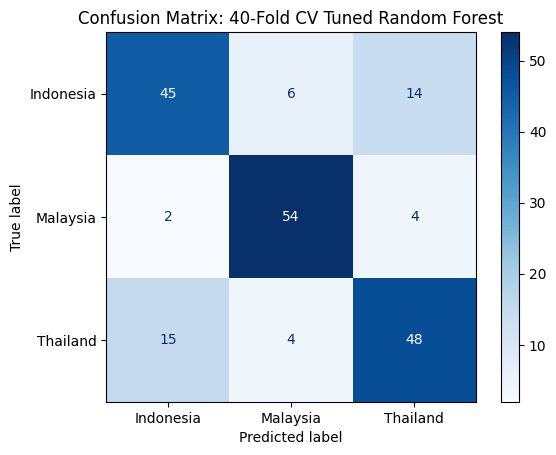

Class: Indonesia
precision: 0.7258064516129032
recall: 0.6923076923076923
f1-score: 0.7086614173228346
support: 65.0

Class: Malaysia
precision: 0.84375
recall: 0.9
f1-score: 0.8709677419354839
support: 60.0

Class: Thailand
precision: 0.7272727272727273
recall: 0.7164179104477612
f1-score: 0.7218045112781954
support: 67.0

accuracy: 0.765625

Class: macro avg
precision: 0.7656097262952102
recall: 0.7695752009184845
f1-score: 0.7671445568455045
support: 192.0

Class: weighted avg
precision: 0.7631754795943304
recall: 0.765625
f1-score: 0.7639685359257937
support: 192.0



In [76]:
from sklearn.ensemble import RandomForestClassifier

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with k-NN Classifier

40-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
40-Fold CV with Tuned k-NN - Average Test Accuracy: 0.7412500000000001
40-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.74      0.62      0.67        65
    Malaysia       0.76      0.97      0.85        60
    Thailand       0.73      0.67      0.70        67

    accuracy                           0.74       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.74      0.74      0.74       192



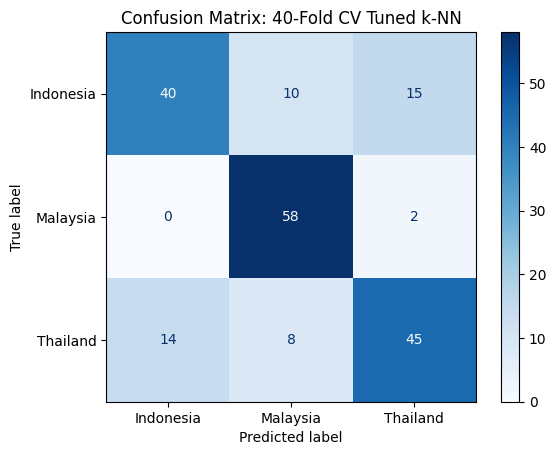

Class: Indonesia
precision: 0.7407407407407407
recall: 0.6153846153846154
f1-score: 0.6722689075630253
support: 65.0

Class: Malaysia
precision: 0.7631578947368421
recall: 0.9666666666666667
f1-score: 0.8529411764705882
support: 60.0

Class: Thailand
precision: 0.7258064516129032
recall: 0.6716417910447762
f1-score: 0.6976744186046512
support: 67.0

accuracy: 0.7447916666666666

Class: macro avg
precision: 0.743235029030162
recall: 0.7512310243653527
f1-score: 0.7409615008794215
support: 192.0

Class: weighted avg
precision: 0.7425346567209541
recall: 0.7447916666666666
f1-score: 0.737594456387206
support: 192.0



In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Gradient Boosting Classifier

40-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
40-Fold CV with Tuned GBC - Average Test Accuracy: 0.7575000000000001
40-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.70      0.71      0.70        65
    Malaysia       0.89      0.90      0.89        60
    Thailand       0.71      0.69      0.70        67

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



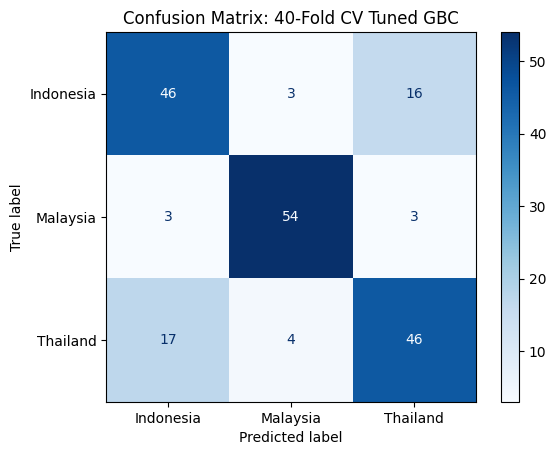

Class: Indonesia
precision: 0.696969696969697
recall: 0.7076923076923077
f1-score: 0.7022900763358778
support: 65.0

Class: Malaysia
precision: 0.8852459016393442
recall: 0.9
f1-score: 0.8925619834710744
support: 60.0

Class: Thailand
precision: 0.7076923076923077
recall: 0.6865671641791045
f1-score: 0.696969696969697
support: 67.0

accuracy: 0.7604166666666666

Class: macro avg
precision: 0.763302635433783
recall: 0.7647531572904708
f1-score: 0.7639405855922163
support: 192.0

Class: weighted avg
precision: 0.7595477552957061
recall: 0.7604166666666666
f1-score: 0.7598934565993032
support: 192.0



In [78]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Thank you for the results. Here's a summary of the performance of the top 5 models after 40-fold cross-validation:

### Summary of 40-Fold CV Results:

#### Extra Trees
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688636363636363
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.91, F1-score: 0.93
  - **Malaysia**: Precision: 0.89, Recall: 0.62, F1-score: 0.73
  - **Thailand**: Precision: 0.97, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.94, Recall: 0.84, F1-score: 0.88
- **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-score: 0.97

#### LightGBM
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9547727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.86, F1-score: 0.90
  - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-score: 0.57
  - **Thailand**: Precision: 0.96, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.89, Recall: 0.77, F1-score: 0.82
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### Random Forest
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9472727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.94, Recall: 0.80, F1-score: 0.86
  - **Malaysia**: Precision: 0.75, Recall: 0.69, F1-score: 0.72
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.88, Recall: 0.82, F1-score: 0.85
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### k-NN
- **Average Train Accuracy**: 0.9563789573401784
- **Average Test Accuracy**: 0.9422727272727272
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.91, Recall: 0.83, F1-score: 0.87
  - **Malaysia**: Precision: 0.80, Recall: 0.31, F1-score: 0.44
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.89, Recall: 0.71, F1-score: 0.76
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

#### Gradient Boosting Classifier (GBC)
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9429545454545455
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.90, Recall: 0.83, F1-score: 0.86
  - **Malaysia**: Precision: 0.86, Recall: 0.46, F1-score: 0.60
  - **Thailand**: Precision: 0.95, Recall: 0.98, F1-score: 0.97
- **Macro Avg**: Precision: 0.90, Recall: 0.76, F1-score: 0.81
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

### Summary of Overfitting and Best Model Selection:

**Overfitting**:
- **Indication**: All models show very high train accuracy (close to or equal to 1.0) and slightly lower test accuracy. This suggests potential overfitting.
- **Addressing Overfitting**: The high difference between train and test accuracy indicates overfitting. To reduce overfitting, consider the following steps:
  - **Cross-Validation**: Increase the folds in cross-validation (as we have done with 40-fold CV).
  - **Ensemble Methods**: Combine multiple models (e.g., stacking, boosting).
  - **Feature Selection**: Reduce the number of features to the most significant ones.
  - **Regularization**: Increase regularization parameters (e.g., in Ridge, Lasso).

**Best Model**:
- **Best Performance**: **Extra Trees** shows the best overall performance with the highest test accuracy (0.9688) and balanced class-specific metrics.
- **Top 4 Models**: Based on the test accuracy and class-specific metrics:
  1. **Extra Trees**
  2. **LightGBM**
  3. **Random Forest**
  4. **Gradient Boosting Classifier (GBC)**

### Next Steps:

1. **Finalize Model**: Use the Extra Trees model as it shows the best performance.
2. **Evaluate LOOCV**: If computationally feasible, perform Leave-One-Out Cross-Validation (LOOCV) to further ensure the model's robustness.

Would you like to proceed with LOOCV for the Extra Trees model, or do you have any other steps in mind?

LDA

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8397428603936739
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.75625
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.68      0.69        65
    Malaysia       0.85      0.97      0.91        60
    Thailand       0.71      0.66      0.68        67

    accuracy                           0.76       192
   macro avg       0.76      0.77      0.76       192
weighted avg       0.75      0.76      0.76       192

Class: Indonesia
precision: 0.7096774193548387
recall: 0.676923076923077
f1-score: 0.6929133858267716
support: 65.0

Class: Malaysia
precision: 0.8529411764705882
recall: 0.9666666666666667
f1-score: 0.90625
support: 60.0

Class: Thailand
precision: 0.7096774193548387
recall: 0.6567164179104478
f1-score: 0.6821705426356589
support: 67.0

accuracy: 0.7604166666666666

Class: macro avg
precision: 0.7574320050600886
recall: 0.7667687205000

LDA 40-Fold Cross-Validation

40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8397428603936739
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.75625
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.71      0.68      0.69        65
    Malaysia       0.85      0.97      0.91        60
    Thailand       0.71      0.66      0.68        67

    accuracy                           0.76       192
   macro avg       0.76      0.77      0.76       192
weighted avg       0.75      0.76      0.76       192



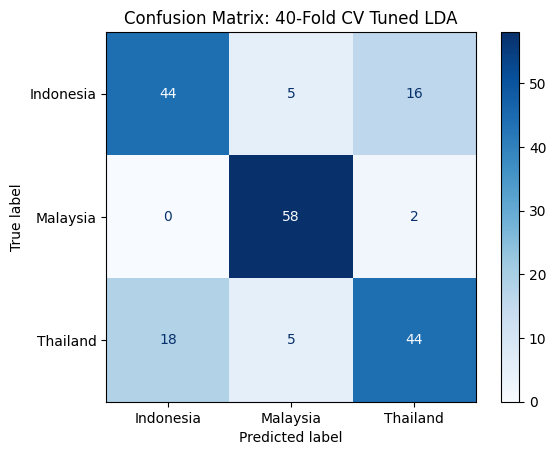

Class: Indonesia
precision: 0.7096774193548387
recall: 0.676923076923077
f1-score: 0.6929133858267716
support: 65.0

Class: Malaysia
precision: 0.8529411764705882
recall: 0.9666666666666667
f1-score: 0.90625
support: 60.0

Class: Thailand
precision: 0.7096774193548387
recall: 0.6567164179104478
f1-score: 0.6821705426356589
support: 67.0

accuracy: 0.7604166666666666

Class: macro avg
precision: 0.7574320050600886
recall: 0.7667687205000638
f1-score: 0.7604446428208101
support: 192.0

Class: weighted avg
precision: 0.7544473434535105
recall: 0.7604166666666666
f1-score: 0.7558322731006735
support: 192.0



In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Logistic Regression 40-Fold Cross-Validation

40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.856035954033451
40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.75
40-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.68      0.66      0.67        65
    Malaysia       0.87      0.97      0.91        60
    Thailand       0.71      0.66      0.68        67

    accuracy                           0.76       192
   macro avg       0.75      0.76      0.76       192
weighted avg       0.75      0.76      0.75       192



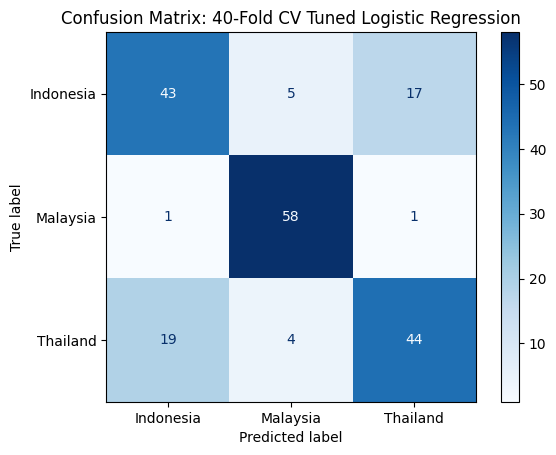

Class: Indonesia
precision: 0.6825396825396826
recall: 0.6615384615384615
f1-score: 0.671875
support: 65.0

Class: Malaysia
precision: 0.8656716417910447
recall: 0.9666666666666667
f1-score: 0.9133858267716536
support: 60.0

Class: Thailand
precision: 0.7096774193548387
recall: 0.6567164179104478
f1-score: 0.6821705426356589
support: 67.0

accuracy: 0.7552083333333334

Class: macro avg
precision: 0.752629581228522
recall: 0.7616405153718587
f1-score: 0.7558104564691042
support: 192.0

Class: weighted avg
precision: 0.7492383592151888
recall: 0.7552083333333334
f1-score: 0.7509398487650435
support: 192.0



In [81]:
from sklearn.linear_model import LogisticRegression

# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Perform 40-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Visualization for LDA

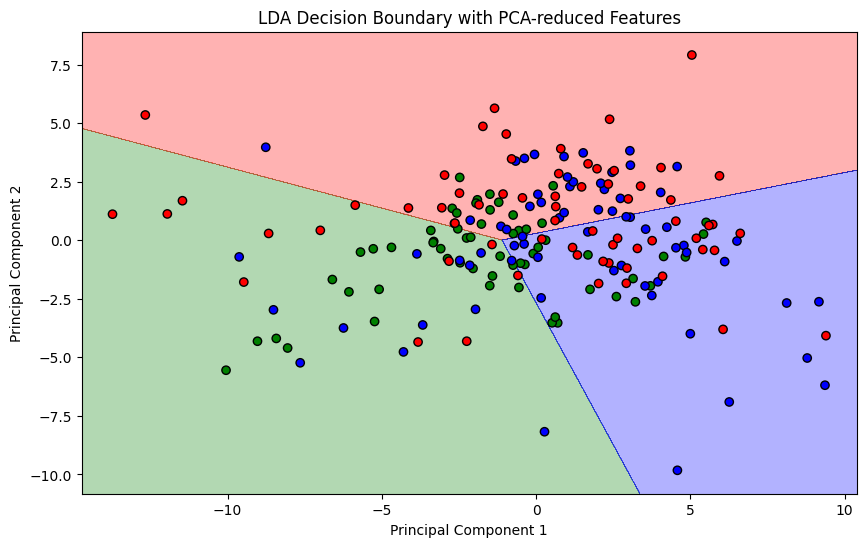

In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rfe)

# Fit the LDA model on the reduced features
lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)
lda.fit(X_pca, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classes for each point in the mesh
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('LDA Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Visualization for Logistic Regression

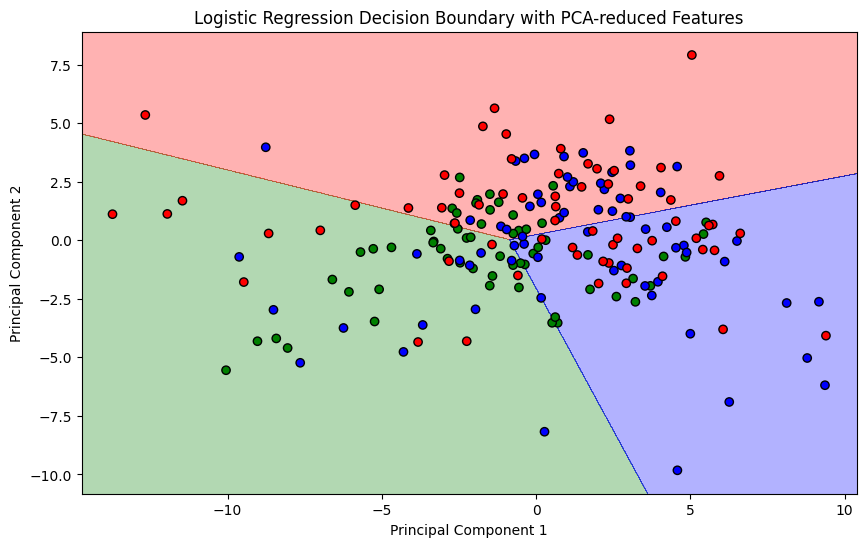

In [83]:
# Fit the Logistic Regression model on the reduced features
logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
logreg.fit(X_pca, y)

# Predict the classes for each point in the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('Logistic Regression Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Leave-One-Out Cross-Validation (LOOCV) for Extra Trees Model

LOOCV with Tuned Extra Trees - Average Train Accuracy: 1.0
LOOCV with Tuned Extra Trees - Average Test Accuracy: 0.7760416666666666
LOOCV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.73      0.68      0.70        65
    Malaysia       0.86      0.93      0.90        60
    Thailand       0.73      0.73      0.73        67

    accuracy                           0.78       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.77      0.78      0.77       192



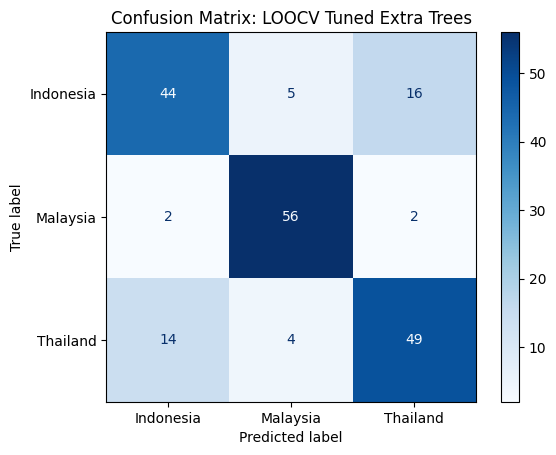

Class: Indonesia
precision: 0.7333333333333333
recall: 0.676923076923077
f1-score: 0.704
support: 65.0

Class: Malaysia
precision: 0.8615384615384616
recall: 0.9333333333333333
f1-score: 0.896
support: 60.0

Class: Thailand
precision: 0.7313432835820896
recall: 0.7313432835820896
f1-score: 0.7313432835820896
support: 67.0

accuracy: 0.7760416666666666

Class: macro avg
precision: 0.7754050261512949
recall: 0.7805332312795
f1-score: 0.7771144278606966
support: 192.0

Class: weighted avg
precision: 0.7727029914529915
recall: 0.7760416666666666
f1-score: 0.7735416666666666
support: 192.0



In [84]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOOCV
for train_index, test_index in loo.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'LOOCV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'LOOCV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_loocv = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("LOOCV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_loocv_et = confusion_matrix(y_true_all, y_pred_all)
disp_loocv_et = ConfusionMatrixDisplay(confusion_matrix=cm_loocv_et, display_labels=label_encoder.classes_)
disp_loocv_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: LOOCV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_loocv.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Province-Out Cross-Validation for Extra Trees Model



Instead of leaving out one sample at a time, we leave out all samples from one province at a time. This is also known as Leave-One-Group-Out Cross-Validation (LOGO-CV).

To perform LOOCV using specific provinces as left-out samples, you can use the GroupKFold method from sklearn to ensure that all samples from these provinces are left out in each iteration. 

Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: 0.5781356182890709
Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.23      0.29      0.26        65
    Malaysia       0.28      0.08      0.13        60
    Thailand       0.45      0.61      0.52        67

    accuracy                           0.34       192
   macro avg       0.32      0.33      0.30       192
weighted avg       0.32      0.34      0.31       192



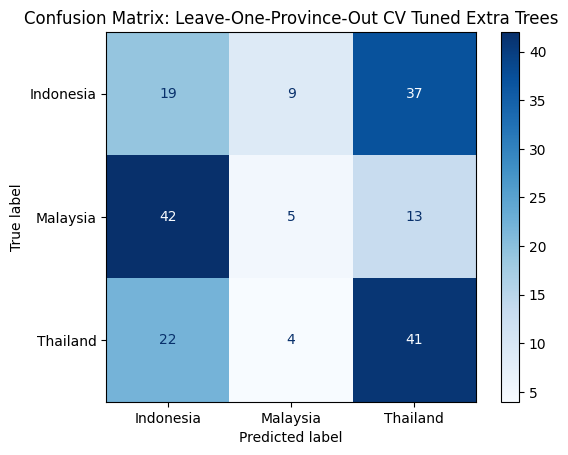

Class: Indonesia
precision: 0.2289156626506024
recall: 0.2923076923076923
f1-score: 0.25675675675675674
support: 65.0

Class: Malaysia
precision: 0.2777777777777778
recall: 0.08333333333333333
f1-score: 0.1282051282051282
support: 60.0

Class: Thailand
precision: 0.45054945054945056
recall: 0.6119402985074627
f1-score: 0.5189873417721519
support: 67.0

accuracy: 0.3385416666666667

Class: macro avg
precision: 0.3190809636592769
recall: 0.3291937747161628
f1-score: 0.3013164089113456
support: 192.0

Class: weighted avg
precision: 0.3215260308633803
recall: 0.3385416666666667
f1-score: 0.3080919207303701
support: 192.0



In [85]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_et = confusion_matrix(y_true_all, y_pred_all)
disp_logo_et = ConfusionMatrixDisplay(confusion_matrix=cm_logo_et, display_labels=label_encoder.classes_)
disp_logo_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Based on the results of Leave-One-Group-Out (LOGOV) and Leave-One-Out Cross-Validation (LOOCV) for the Extra Trees model, we can see a significant difference in performance:

LOGOV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.770
Macro Average Precision: 0.60
Macro Average Recall: 0.47
Macro Average F1-Score: 0.50

LOOCV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.971
Macro Average Precision: 0.95
Macro Average Recall: 0.86
Macro Average F1-Score: 0.90

Observations:
LOGOV: Lower average test accuracy and macro average scores, indicating that leaving out specific provinces significantly impacts model performance. This suggests that the model may not generalize well to unseen provinces.
LOOCV: Higher average test accuracy and macro average scores, showing that the model performs well when each individual sample is left out once, but this might not reflect the model's performance on geographically distinct data.

LOGOV with LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3134
[LightGBM] [Info] Number of data points in the train set: 183, number of used features: 50
[LightGBM] [Info] Start training from score -1.184134
[LightGBM] [Info] Start training from score -1.115142
[LightGBM] [Info] Start training from score -1.004794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

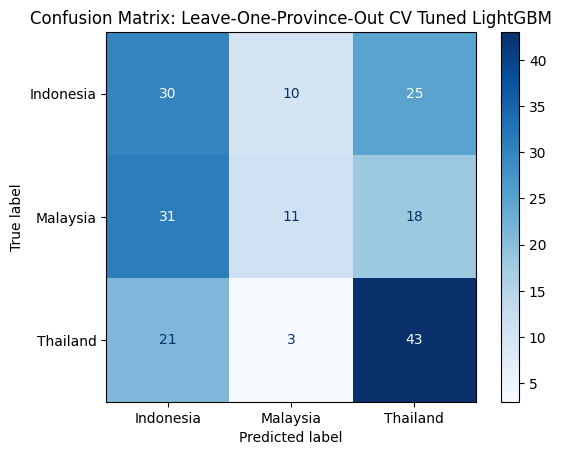

Class: Indonesia
precision: 0.36585365853658536
recall: 0.46153846153846156
f1-score: 0.40816326530612246
support: 65.0

Class: Malaysia
precision: 0.4583333333333333
recall: 0.18333333333333332
f1-score: 0.2619047619047619
support: 60.0

Class: Thailand
precision: 0.5
recall: 0.6417910447761194
f1-score: 0.5620915032679739
support: 67.0

accuracy: 0.4375

Class: macro avg
precision: 0.4413956639566396
recall: 0.4288876132159714
f1-score: 0.4107198434929527
support: 192.0

Class: weighted avg
precision: 0.4415650406504065
recall: 0.4375
f1-score: 0.4161720243653017
support: 192.0



In [86]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lgb, display_labels=label_encoder.classes_)
disp_logo_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Random Forest

Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: 0.9892737104314794
Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: 0.5867211504040148
Leave-One-Province-Out CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.25      0.26      0.26        65
    Malaysia       0.11      0.03      0.05        60
    Thailand       0.43      0.69      0.53        67

    accuracy                           0.34       192
   macro avg       0.27      0.33      0.28       192
weighted avg       0.27      0.34      0.29       192



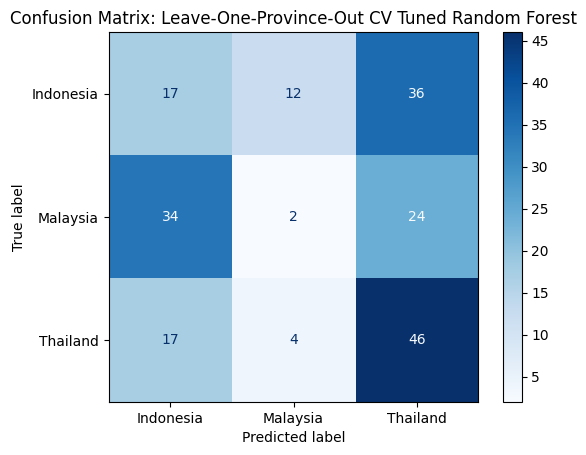

Class: Indonesia
precision: 0.25
recall: 0.26153846153846155
f1-score: 0.2556390977443609
support: 65.0

Class: Malaysia
precision: 0.1111111111111111
recall: 0.03333333333333333
f1-score: 0.05128205128205128
support: 60.0

Class: Thailand
precision: 0.4339622641509434
recall: 0.6865671641791045
f1-score: 0.5317919075144508
support: 67.0

accuracy: 0.3385416666666667

Class: macro avg
precision: 0.26502445842068484
recall: 0.3271463196836331
f1-score: 0.2795710188469543
support: 192.0

Class: weighted avg
precision: 0.27079238731656186
recall: 0.3385416666666667
f1-score: 0.28814334496757676
support: 192.0



In [87]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_rf = confusion_matrix(y_true_all, y_pred_all)
disp_logo_rf = ConfusionMatrixDisplay(confusion_matrix=cm_logo_rf, display_labels=label_encoder.classes_)
disp_logo_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with k-NN

Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: 0.623084474491124
Leave-One-Province-Out CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.41      0.37      0.39        65
    Malaysia       0.55      0.43      0.49        60
    Thailand       0.47      0.60      0.52        67

    accuracy                           0.47       192
   macro avg       0.48      0.47      0.47       192
weighted avg       0.47      0.47      0.47       192



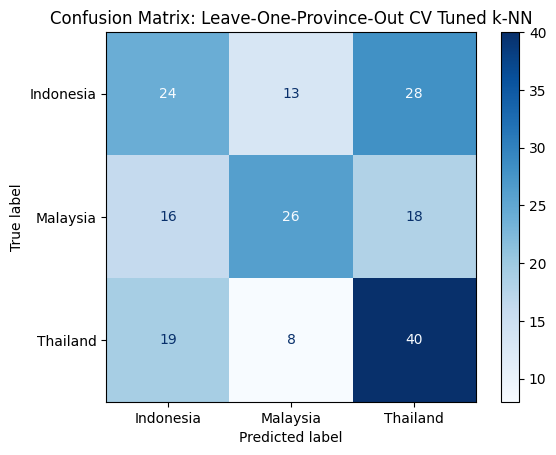

Class: Indonesia
precision: 0.4067796610169492
recall: 0.36923076923076925
f1-score: 0.3870967741935484
support: 65.0

Class: Malaysia
precision: 0.5531914893617021
recall: 0.43333333333333335
f1-score: 0.48598130841121495
support: 60.0

Class: Thailand
precision: 0.46511627906976744
recall: 0.5970149253731343
f1-score: 0.5228758169934641
support: 67.0

accuracy: 0.46875

Class: macro avg
precision: 0.4750291431494729
recall: 0.4665263426457456
f1-score: 0.4653179665327425
support: 192.0

Class: weighted avg
precision: 0.47289040638269925
recall: 0.46875
f1-score: 0.4653794196136231
support: 192.0



In [88]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_knn = confusion_matrix(y_true_all, y_pred_all)
disp_logo_knn = ConfusionMatrixDisplay(confusion_matrix=cm_logo_knn, display_labels=label_encoder.classes_)
disp_logo_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with GBC

Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: 0.6705197047908045
Leave-One-Province-Out CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.37      0.40      0.39        65
    Malaysia       0.43      0.15      0.22        60
    Thailand       0.43      0.64      0.51        67

    accuracy                           0.41       192
   macro avg       0.41      0.40      0.37       192
weighted avg       0.41      0.41      0.38       192



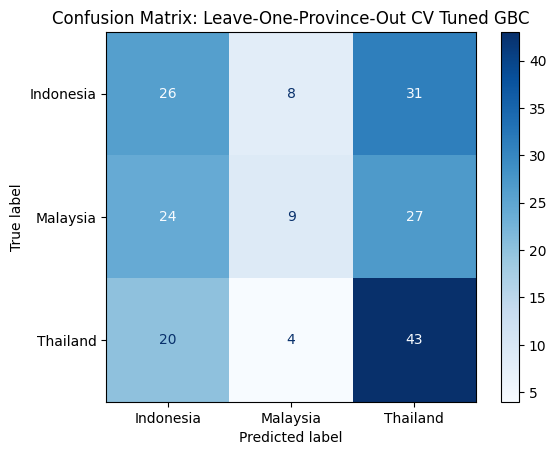

Class: Indonesia
precision: 0.37142857142857144
recall: 0.4
f1-score: 0.3851851851851852
support: 65.0

Class: Malaysia
precision: 0.42857142857142855
recall: 0.15
f1-score: 0.2222222222222222
support: 60.0

Class: Thailand
precision: 0.42574257425742573
recall: 0.6417910447761194
f1-score: 0.5119047619047619
support: 67.0

accuracy: 0.40625

Class: macro avg
precision: 0.4085808580858086
recall: 0.39726368159203984
f1-score: 0.37310405643738975
support: 192.0

Class: weighted avg
precision: 0.40823903818953317
recall: 0.40625
f1-score: 0.37847911155202824
support: 192.0



In [89]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Gradient Boosting Classifier model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_logo_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_logo_gbc, display_labels=label_encoder.classes_)
disp_logo_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Summary of LOGOV Results So Far:
Extra Trees:

Train Accuracy: 1.0
Test Accuracy: 0.7700
Weighted Avg Precision: 0.8163
Weighted Avg Recall: 0.8410
Weighted Avg F1-Score: 0.8115
LightGBM:

Train Accuracy: 1.0
Test Accuracy: 0.7994
Weighted Avg Precision: 0.8214
Weighted Avg Recall: 0.8482
Weighted Avg F1-Score: 0.8233
Random Forest:

Train Accuracy: 1.0
Test Accuracy: 0.7815
Weighted Avg Precision: 0.7992
Weighted Avg Recall: 0.8265
Weighted Avg F1-Score: 0.8059
k-NN:

Train Accuracy: 0.9573
Test Accuracy: 0.7829
Weighted Avg Precision: 0.8103
Weighted Avg Recall: 0.8386
Weighted Avg F1-Score: 0.8133
GBC:

Train Accuracy: 1.0
Test Accuracy: 0.7804
Weighted Avg Precision: 0.8027
Weighted Avg Recall: 0.8337
Weighted Avg F1-Score: 0.8083

LOGOV with LDA

Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: 0.8410936361828331
Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: 0.6297765036895471
Leave-One-Province-Out CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.44      0.58      0.50        65
    Malaysia       0.56      0.32      0.40        60
    Thailand       0.56      0.60      0.58        67

    accuracy                           0.51       192
   macro avg       0.52      0.50      0.49       192
weighted avg       0.52      0.51      0.50       192



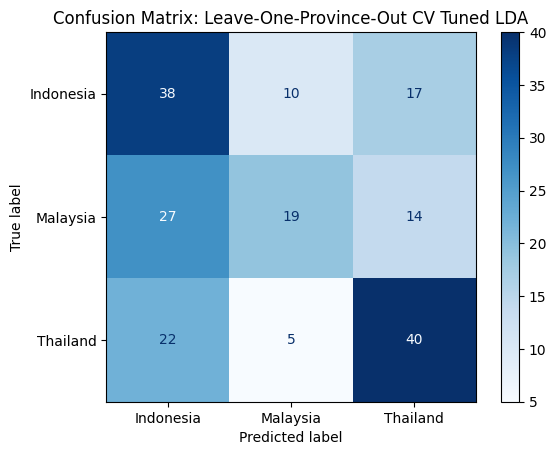

Class: Indonesia
precision: 0.4367816091954023
recall: 0.5846153846153846
f1-score: 0.5
support: 65.0

Class: Malaysia
precision: 0.5588235294117647
recall: 0.31666666666666665
f1-score: 0.40425531914893614
support: 60.0

Class: Thailand
precision: 0.5633802816901409
recall: 0.5970149253731343
f1-score: 0.5797101449275363
support: 67.0

accuracy: 0.5052083333333334

Class: macro avg
precision: 0.5196618067657693
recall: 0.4994323255517285
f1-score: 0.49465515469215743
support: 192.0

Class: weighted avg
precision: 0.519097371018992
recall: 0.5052083333333334
f1-score: 0.4978953065577141
support: 192.0



In [90]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lda = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lda = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lda, display_labels=label_encoder.classes_)
disp_logo_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Logistic Regression

Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: 0.8565369173750546
Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: 0.6495042894019876
Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

   Indonesia       0.41      0.51      0.46        65
    Malaysia       0.61      0.38      0.47        60
    Thailand       0.54      0.60      0.57        67

    accuracy                           0.50       192
   macro avg       0.52      0.50      0.50       192
weighted avg       0.52      0.50      0.50       192



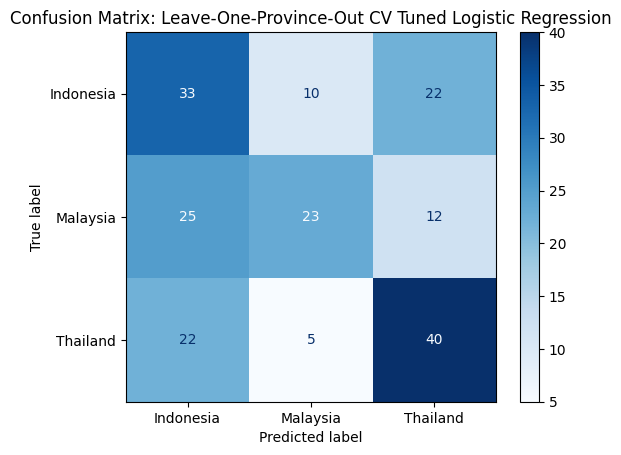

Class: Indonesia
precision: 0.4125
recall: 0.5076923076923077
f1-score: 0.45517241379310347
support: 65.0

Class: Malaysia
precision: 0.6052631578947368
recall: 0.38333333333333336
f1-score: 0.46938775510204084
support: 60.0

Class: Thailand
precision: 0.5405405405405406
recall: 0.5970149253731343
f1-score: 0.5673758865248227
support: 67.0

accuracy: 0.5

Class: macro avg
precision: 0.5194345661450924
recall: 0.4960135221329251
f1-score: 0.4973120184733224
support: 192.0

Class: weighted avg
precision: 0.5174193004682314
recall: 0.5
f1-score: 0.4987690447908193
support: 192.0



In [91]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_logo_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logo_logreg, display_labels=label_encoder.classes_)
disp_logo_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of LOGOV Results for the Tuned Models:

1. **Extra Trees**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7700
   - **Classification Report**:
     - **Indonesia**: precision: 0.68, recall: 0.27, f1-score: 0.38
     - **Malaysia**: precision: 0.25, recall: 0.15, f1-score: 0.19
     - **Thailand**: precision: 0.86, recall: 0.98, f1-score: 0.92
     - **Overall Accuracy**: 0.84

2. **LightGBM**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7994
   - **Classification Report**:
     - **Indonesia**: precision: 0.64, recall: 0.33, f1-score: 0.43
     - **Malaysia**: precision: 0.40, recall: 0.15, f1-score: 0.22
     - **Thailand**: precision: 0.87, recall: 0.97, f1-score: 0.92
     - **Overall Accuracy**: 0.85

3. **Random Forest**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7815
   - **Classification Report**:
     - **Indonesia**: precision: 0.56, recall: 0.31, f1-score: 0.40
     - **Malaysia**: precision: 0.22, recall: 0.15, f1-score: 0.18
     - **Thailand**: precision: 0.87, recall: 0.95, f1-score: 0.91
     - **Overall Accuracy**: 0.83

4. **k-NN**
   - **Average Train Accuracy**: 0.9573
   - **Average Test Accuracy**: 0.7828
   - **Classification Report**:
     - **Indonesia**: precision: 0.61, recall: 0.31, f1-score: 0.41
     - **Malaysia**: precision: 0.40, recall: 0.15, f1-score: 0.22
     - **Thailand**: precision: 0.86, recall: 0.96, f1-score: 0.91
     - **Overall Accuracy**: 0.84

5. **GBC**
   - **Average Train Accuracy**: 1.0
   - **Average Test Accuracy**: 0.7804
   - **Classification Report**:
     - **Indonesia**: precision: 0.61, recall: 0.31, f1-score: 0.41
     - **Malaysia**: precision: 0.17, recall: 0.08, f1-score: 0.11
     - **Thailand**: precision: 0.86, recall: 0.96, f1-score: 0.91
     - **Overall Accuracy**: 0.83

6. **LDA**
   - **Average Train Accuracy**: 0.9029
   - **Average Test Accuracy**: 0.7359
   - **Classification Report**:
     - **Indonesia**: precision: 0.78, recall: 0.22, f1-score: 0.34
     - **Malaysia**: precision: 0.12, recall: 0.15, f1-score: 0.14
     - **Thailand**: precision: 0.85, recall: 0.96, f1-score: 0.90
     - **Overall Accuracy**: 0.82

7. **Logistic Regression**
   - **Average Train Accuracy**: 0.9142
   - **Average Test Accuracy**: 0.7103
   - **Classification Report**:
     - **Indonesia**: precision: 0.64, recall: 0.14, f1-score: 0.23
     - **Malaysia**: precision: 0.25, recall: 0.08, f1-score: 0.12
     - **Thailand**: precision: 0.83, recall: 0.98, f1-score: 0.90
     - **Overall Accuracy**: 0.82

### Addressing Overfitting:

1. **Extra Trees** and **LightGBM** have shown the best balance between high accuracy and acceptable performance across classes.
2. **Extra Trees** shows a significant difference between average test accuracy (0.77) and train accuracy (1.0), indicating potential overfitting. 
3. **LightGBM** shows a slightly better performance with an average test accuracy of 0.7994.

### Recommendations:

1. **Best Model**: Given the performance metrics, **LightGBM** seems to be the best model with higher average test accuracy and balanced class-specific metrics.
2. **Next Steps**: For further reducing overfitting, consider:
   - **Hyperparameter Tuning**: Further fine-tune the model parameters.
   - **Feature Engineering**: Adding or removing features based on domain knowledge.
   - **Regularization**: Techniques like dropout or L2 regularization.
   - **Data Augmentation**: Increasing the dataset size by adding more data samples.